In [91]:
%load_ext autoreload
%autoreload 2
from functools import partial
import os
import keras

from datasets import example_datasets, to_numpy
from models import mixture_poissons,poisson_glm
from metrics import mixture_poi_loss, get_bpr_loss_func, mix_bpr, get_penalized_bpr_loss_func_mix
from experiments import training_loop
from plotting_funcs import plot_losses, plot_frontier, plot_component_histograms, plot_winners

import tensorflow as tf
import tensorflow_probability as tfp
import numpy as np
from glob import glob

import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
model_base = '/cluster/tufts/hugheslab/kheuto01/synth_topk/save_long_plot_hist_H3'
penalized_models = glob(f'{model_base}/*/penalized_model')
bpr_models = glob(f'{model_base}/*/bpr_only_model')
nll_models = glob(f'{model_base}/*/nll_only_model')

In [5]:
seed=360
K=4
do_only=True
# tracts/distributions
S=12
# history/features
H = 3
# total timepoints
T= 500

train_dataset, val_dataset, test_dataset = example_datasets(H, T, seed=seed)

input_shape = (H,S)

val_X_THS, val_y_TS = to_numpy(val_dataset)

negative_bpr_K = get_bpr_loss_func(K)

In [86]:
component_preds, mixture_weights = y_preds

predict_constant, predict_variable, predict_lottery = np.zeros_like(component_preds), np.zeros_like(y_preds[0]) , np.zeros_like(y_preds[0])  
predict_constant[:,0:4,:] = 1
predict_variable[:,4:8,:] = 1
predict_lottery[:,8:,:] = 1 


bpr_constant = mix_bpr(val_y_TS, (predict_constant, mixture_weights),
                       negative_bpr_K_func=negative_bpr_K)
bpr_variable = mix_bpr(val_y_TS, (predict_variable, mixture_weights),
                          negative_bpr_K_func=negative_bpr_K)
bpr_lottery = mix_bpr(val_y_TS, (predict_lottery, mixture_weights),
                            negative_bpr_K_func=negative_bpr_K)

print(bpr_constant, bpr_variable, bpr_lottery)  

tf.Tensor(-0.51155, shape=(), dtype=float32) tf.Tensor(-0.50710464, shape=(), dtype=float32) tf.Tensor(-0.3979649, shape=(), dtype=float32)


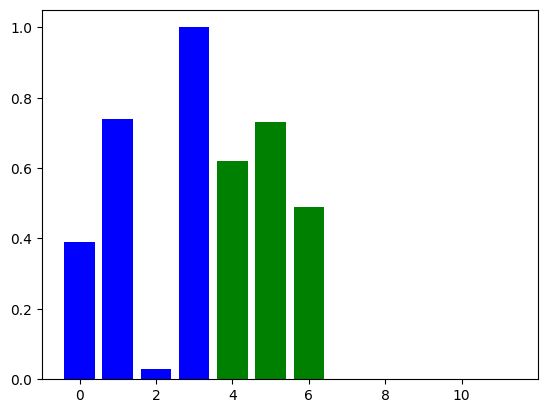

In [89]:
plot_winners(y_preds, K)

In [79]:

bpr = mix_bpr(val_y_TS, y_preds, negative_bpr_K_func=negative_bpr_K)

<tf.Tensor: shape=(), dtype=float32, numpy=-0.5584166>

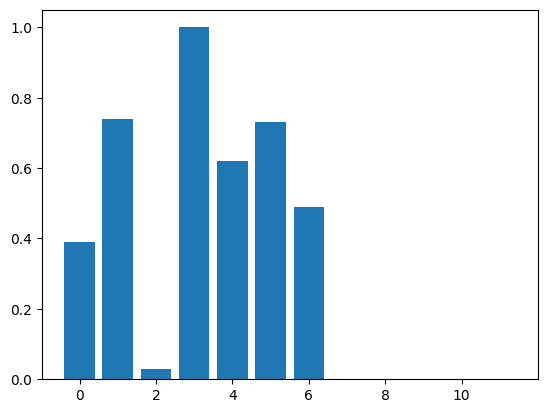

In [78]:
plot_winners(y_preds, K=K)

(4, 12)


/cluster/tufts/hugheslab/kheuto01/mambaforge/envs/pip_k2_tf/lib/python3.11/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


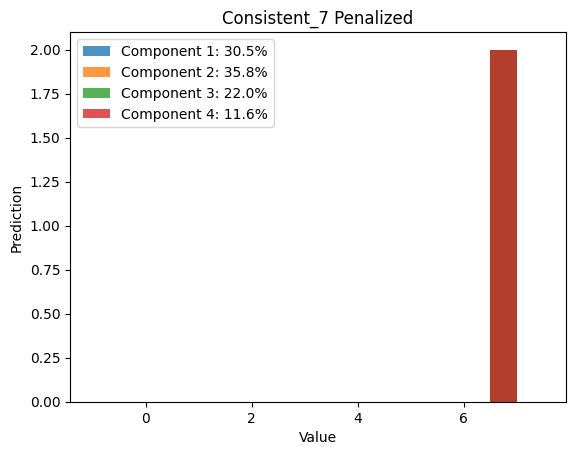

<Figure size 640x480 with 0 Axes>

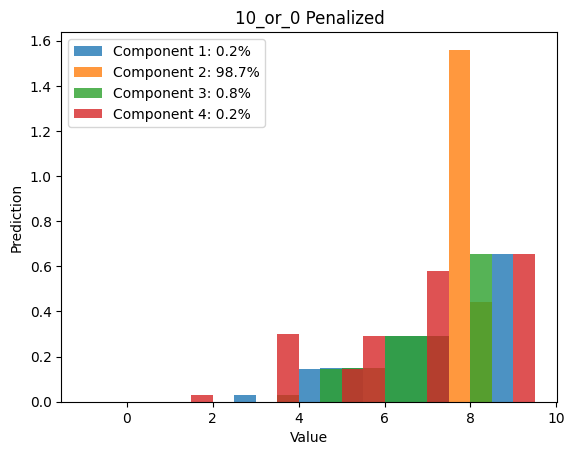

<Figure size 640x480 with 0 Axes>

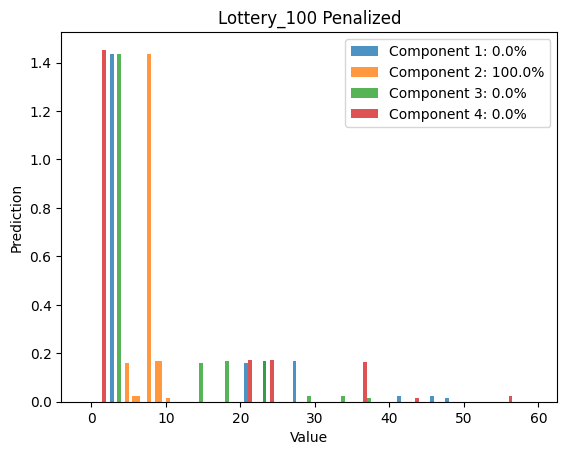

<Figure size 640x480 with 0 Axes>

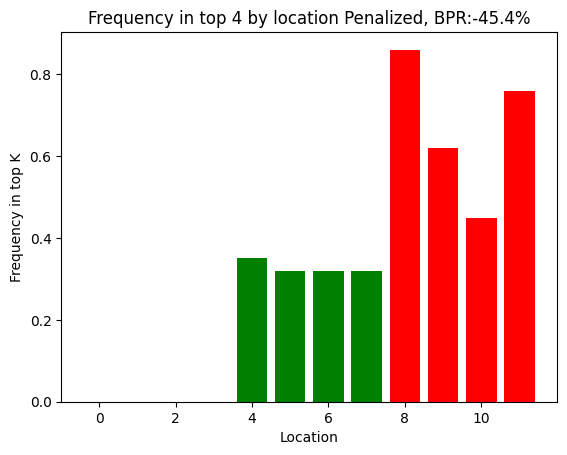

(4, 12)


/cluster/tufts/hugheslab/kheuto01/mambaforge/envs/pip_k2_tf/lib/python3.11/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


<Figure size 640x480 with 0 Axes>

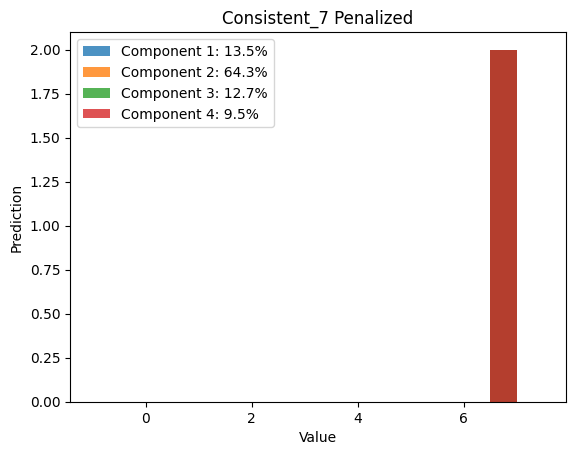

<Figure size 640x480 with 0 Axes>

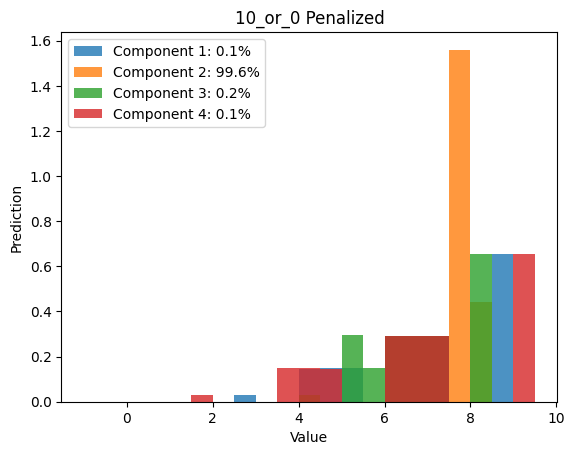

<Figure size 640x480 with 0 Axes>

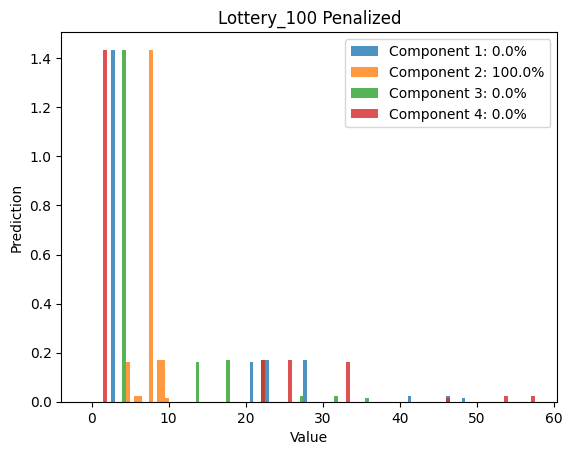

<Figure size 640x480 with 0 Axes>

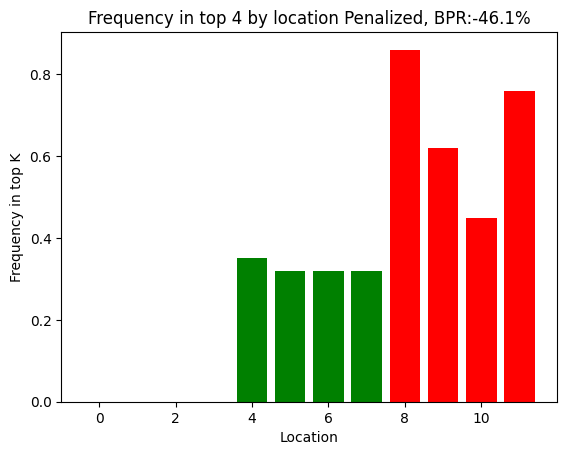

(4, 12)


/cluster/tufts/hugheslab/kheuto01/mambaforge/envs/pip_k2_tf/lib/python3.11/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


<Figure size 640x480 with 0 Axes>

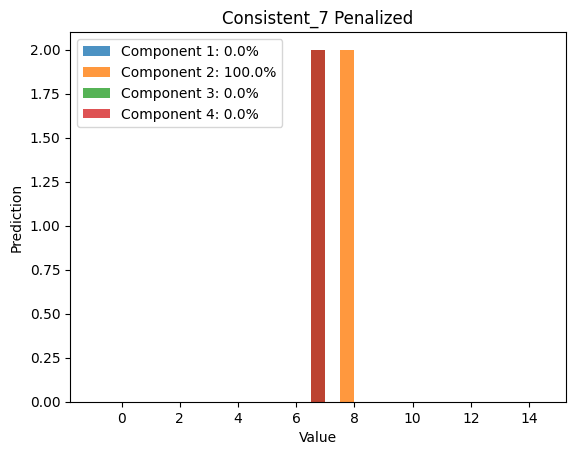

<Figure size 640x480 with 0 Axes>

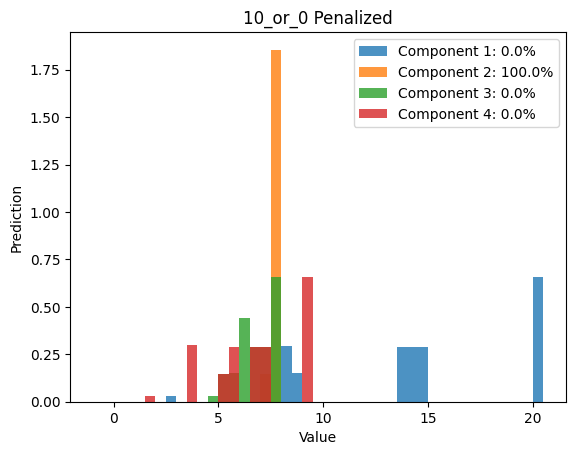

<Figure size 640x480 with 0 Axes>

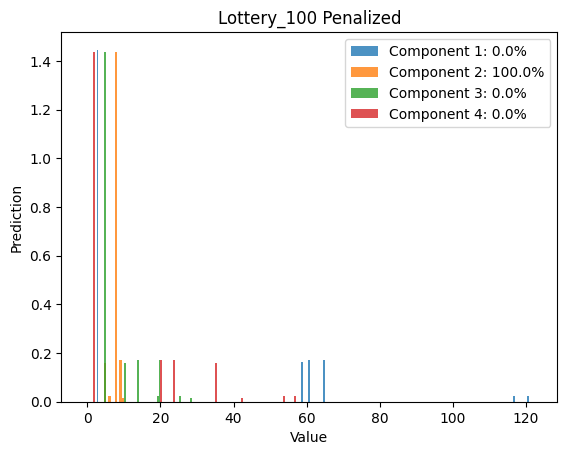

<Figure size 640x480 with 0 Axes>

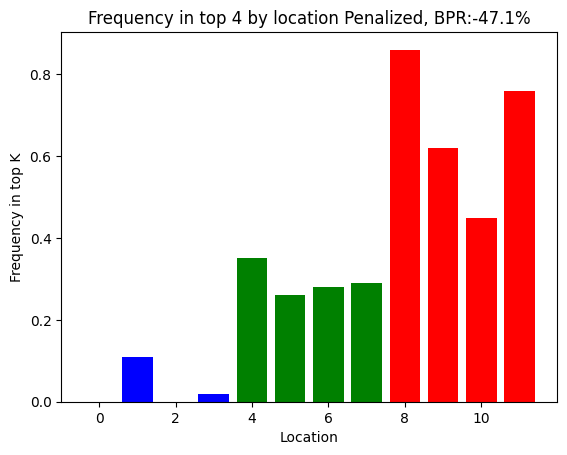

(4, 12)


/cluster/tufts/hugheslab/kheuto01/mambaforge/envs/pip_k2_tf/lib/python3.11/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


<Figure size 640x480 with 0 Axes>

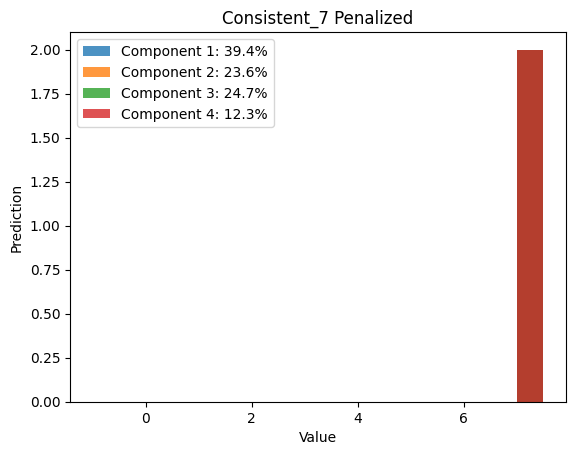

<Figure size 640x480 with 0 Axes>

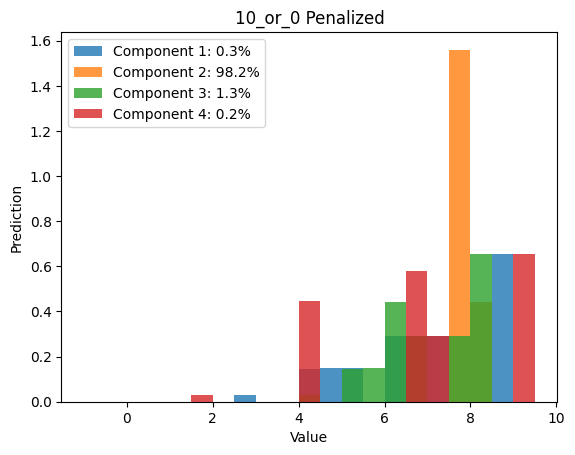

<Figure size 640x480 with 0 Axes>

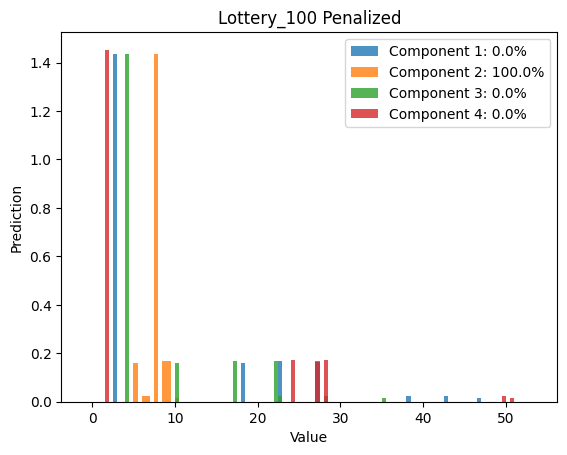

<Figure size 640x480 with 0 Axes>

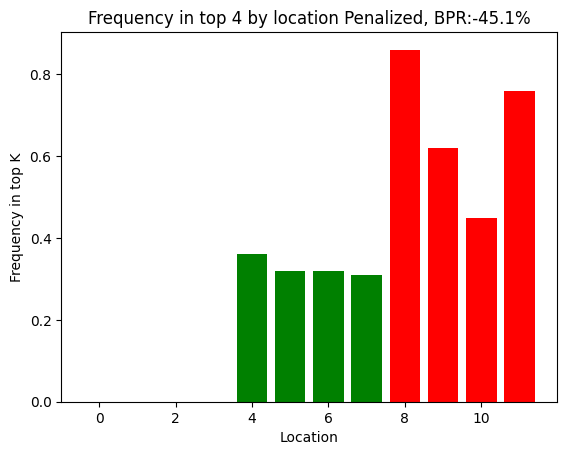

(4, 12)


/cluster/tufts/hugheslab/kheuto01/mambaforge/envs/pip_k2_tf/lib/python3.11/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


<Figure size 640x480 with 0 Axes>

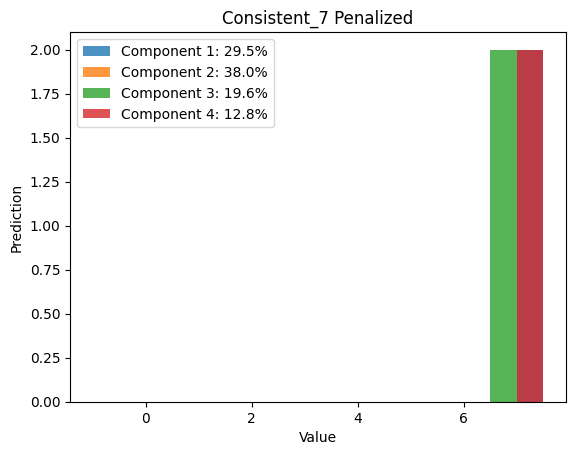

<Figure size 640x480 with 0 Axes>

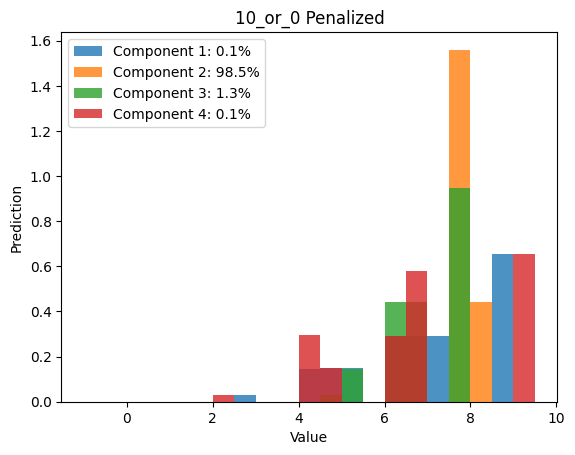

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x2b76fadd0bd0>>
Traceback (most recent call last):
  File "/cluster/tufts/hugheslab/kheuto01/mambaforge/envs/pip_k2_tf/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 770, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 


<Figure size 640x480 with 0 Axes>

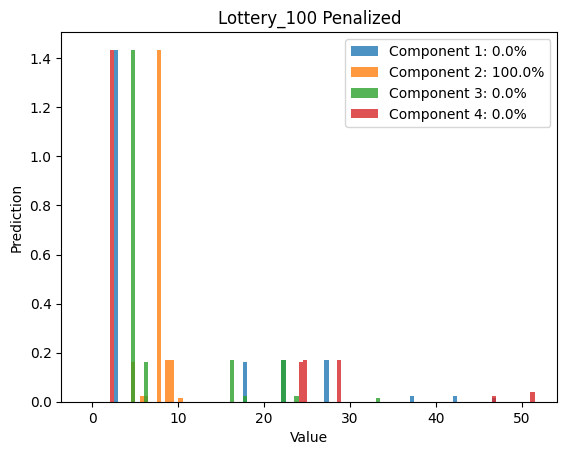

<Figure size 640x480 with 0 Axes>

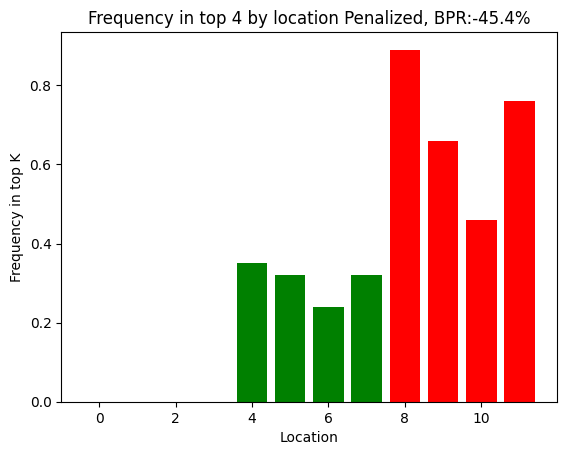

(4, 12)


<Figure size 640x480 with 0 Axes>

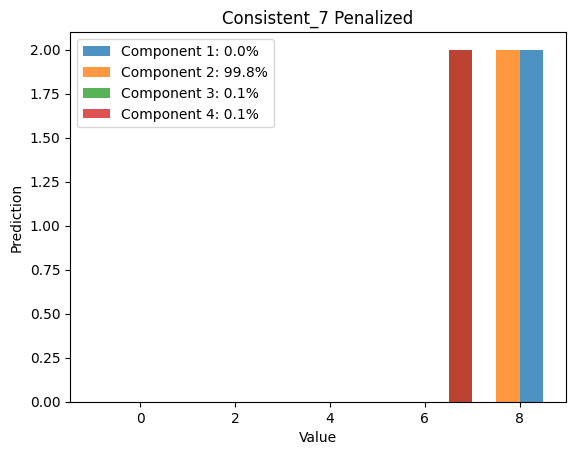

<Figure size 640x480 with 0 Axes>

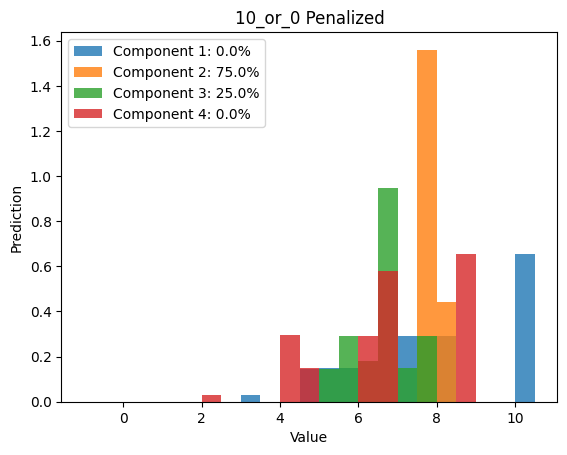

<Figure size 640x480 with 0 Axes>

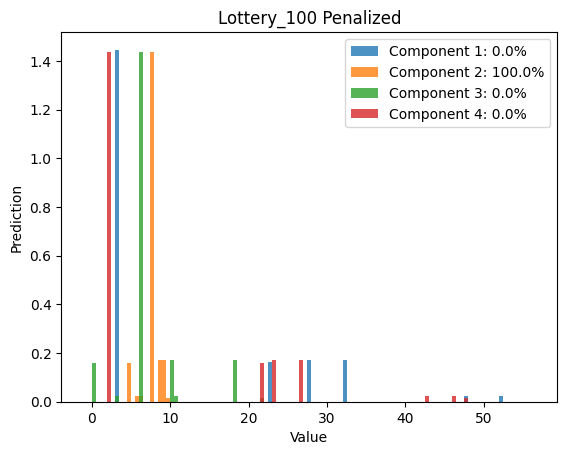

<Figure size 640x480 with 0 Axes>

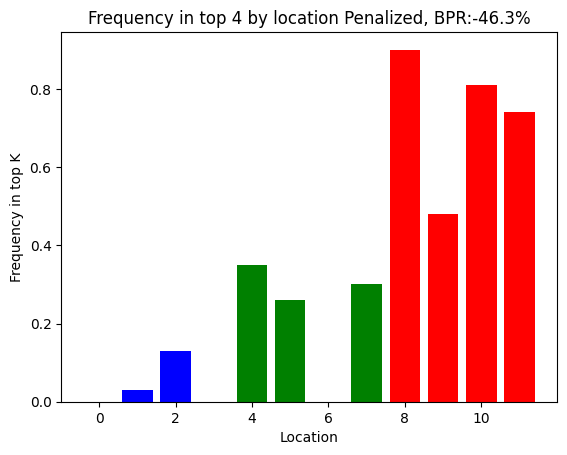

(4, 12)


/cluster/tufts/hugheslab/kheuto01/mambaforge/envs/pip_k2_tf/lib/python3.11/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


<Figure size 640x480 with 0 Axes>

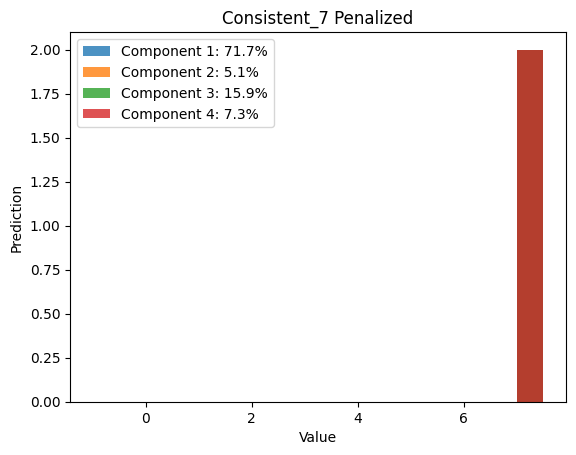

<Figure size 640x480 with 0 Axes>

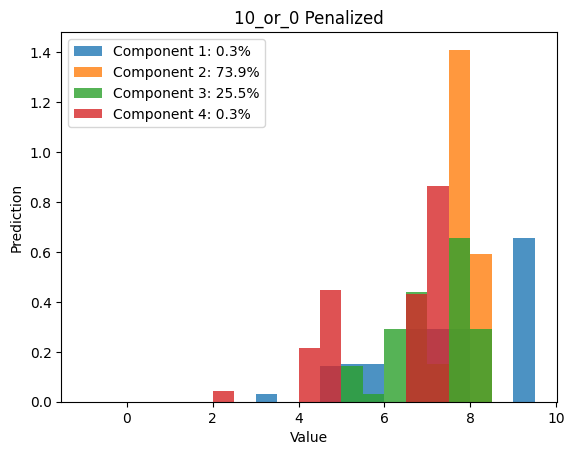

<Figure size 640x480 with 0 Axes>

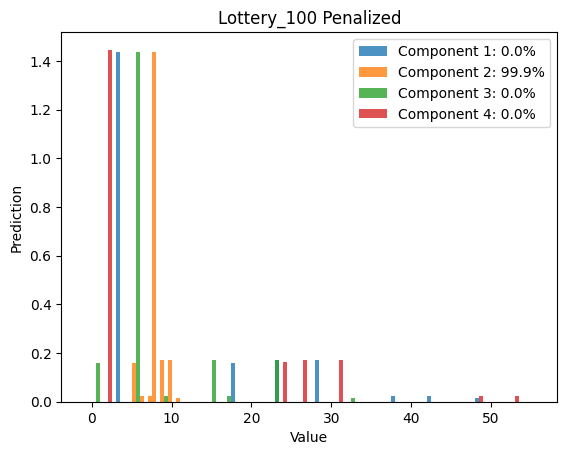

<Figure size 640x480 with 0 Axes>

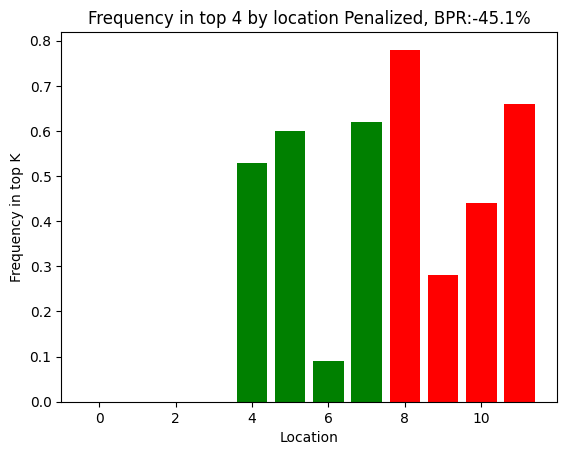

(4, 12)


/cluster/tufts/hugheslab/kheuto01/mambaforge/envs/pip_k2_tf/lib/python3.11/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


<Figure size 640x480 with 0 Axes>

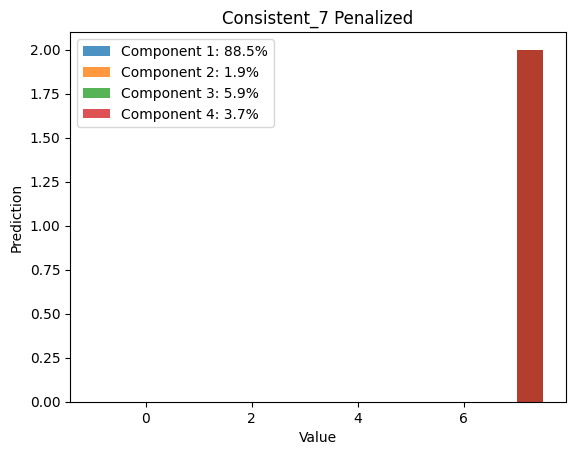

<Figure size 640x480 with 0 Axes>

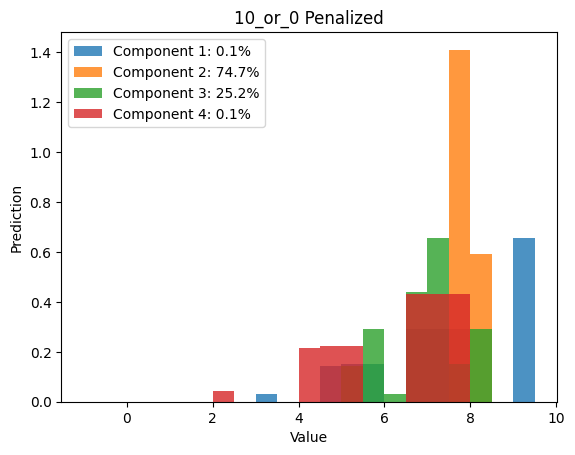

<Figure size 640x480 with 0 Axes>

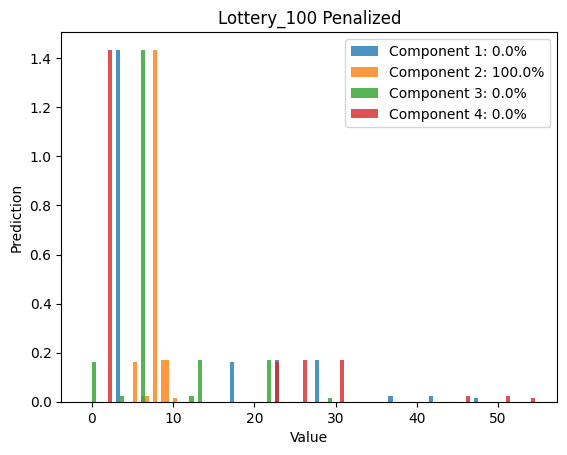

<Figure size 640x480 with 0 Axes>

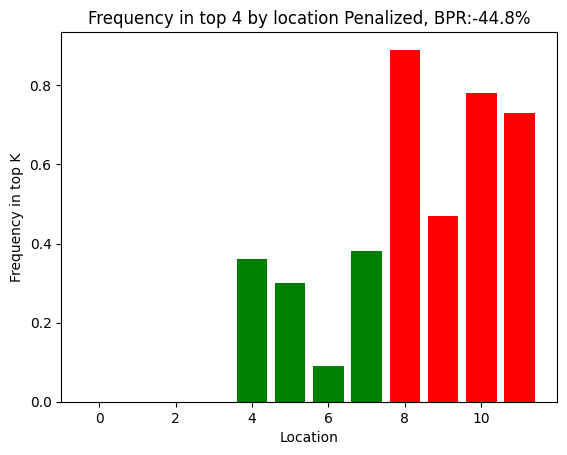

(4, 12)


/cluster/tufts/hugheslab/kheuto01/mambaforge/envs/pip_k2_tf/lib/python3.11/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


<Figure size 640x480 with 0 Axes>

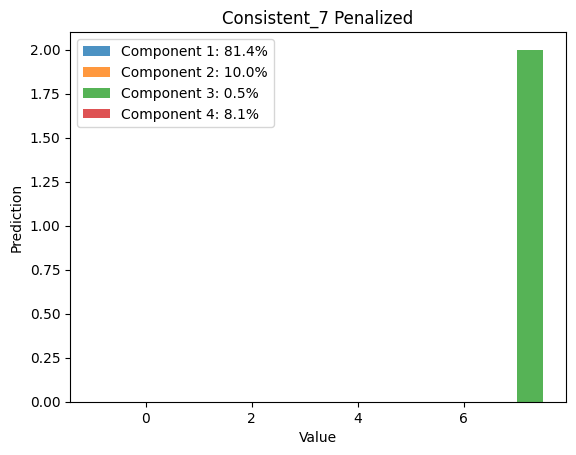

Exception ignored in: <function WeakKeyDictionary.__init__.<locals>.remove at 0x2b7764c6cb80>
Traceback (most recent call last):
  File "/cluster/tufts/hugheslab/kheuto01/mambaforge/envs/pip_k2_tf/lib/python3.11/weakref.py", line 369, in remove
    def remove(k, selfref=ref(self)):

KeyboardInterrupt: 


<Figure size 640x480 with 0 Axes>

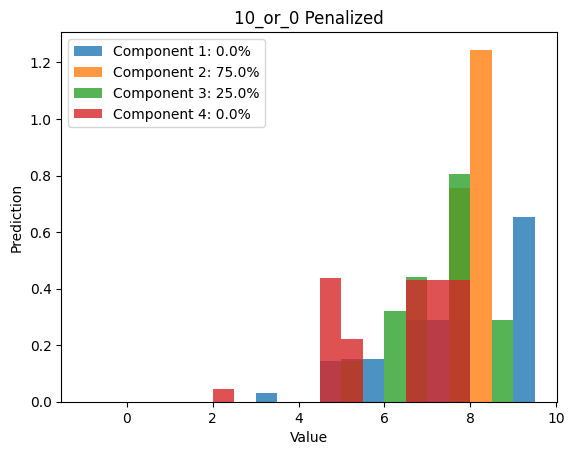

<Figure size 640x480 with 0 Axes>

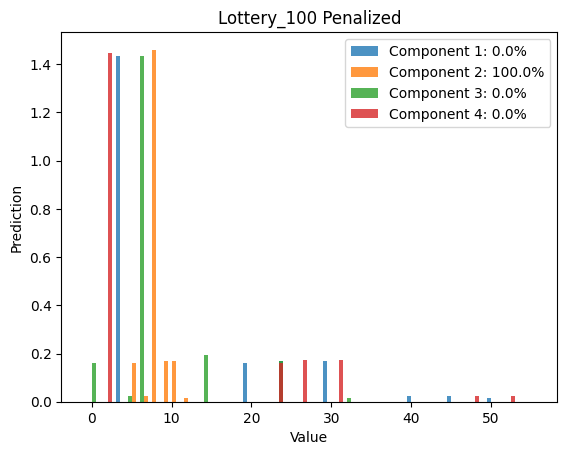

<Figure size 640x480 with 0 Axes>

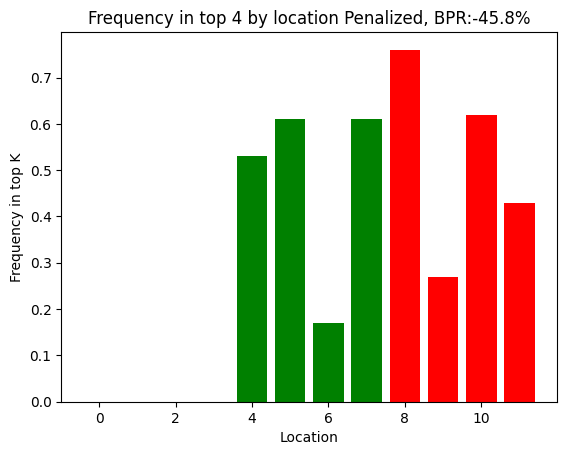

(4, 12)


/cluster/tufts/hugheslab/kheuto01/mambaforge/envs/pip_k2_tf/lib/python3.11/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


<Figure size 640x480 with 0 Axes>

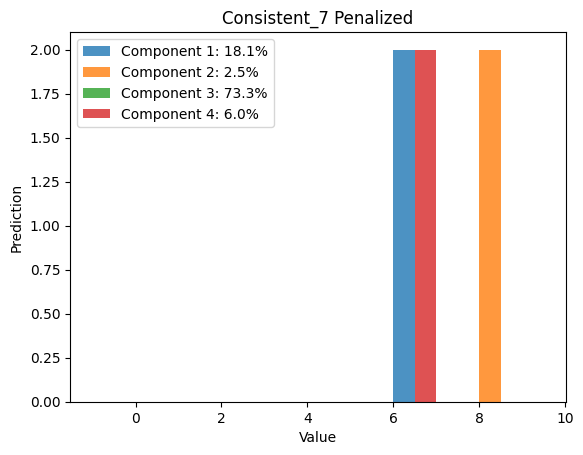

<Figure size 640x480 with 0 Axes>

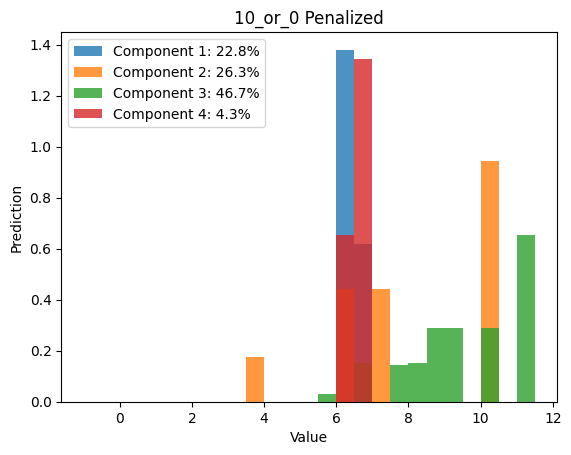

<Figure size 640x480 with 0 Axes>

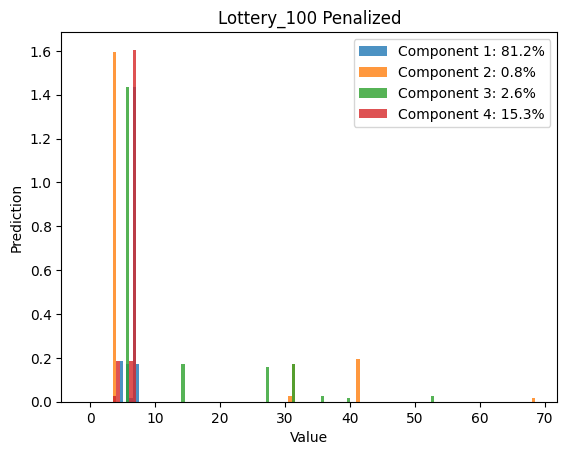

<Figure size 640x480 with 0 Axes>

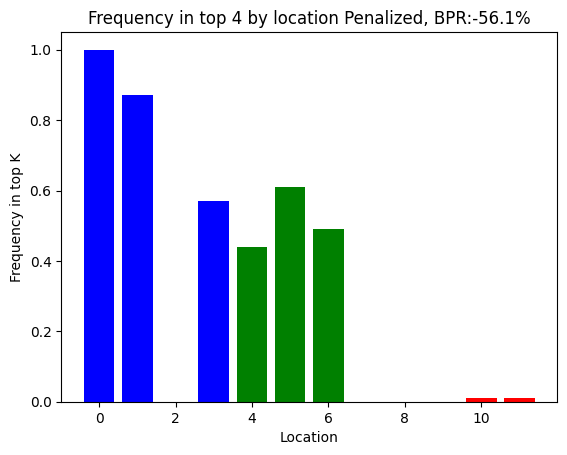

(4, 12)


/cluster/tufts/hugheslab/kheuto01/mambaforge/envs/pip_k2_tf/lib/python3.11/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


<Figure size 640x480 with 0 Axes>

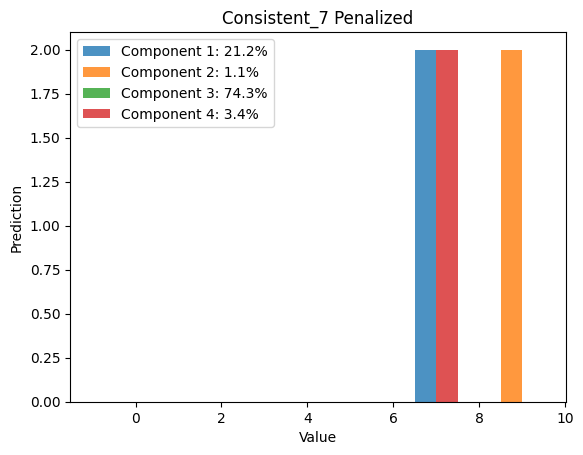

<Figure size 640x480 with 0 Axes>

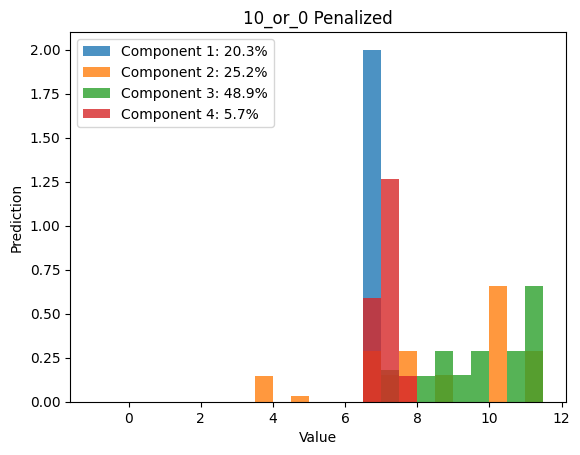

<Figure size 640x480 with 0 Axes>

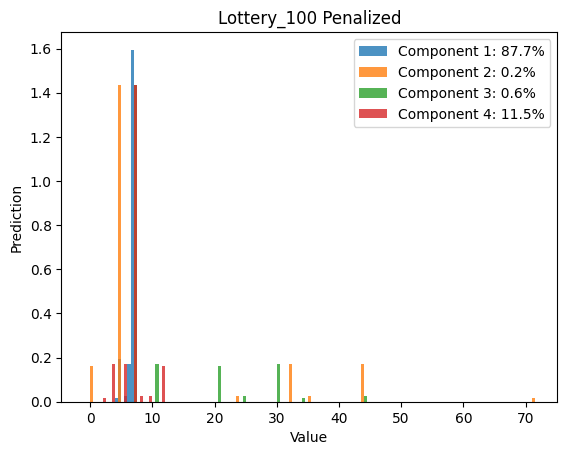

<Figure size 640x480 with 0 Axes>

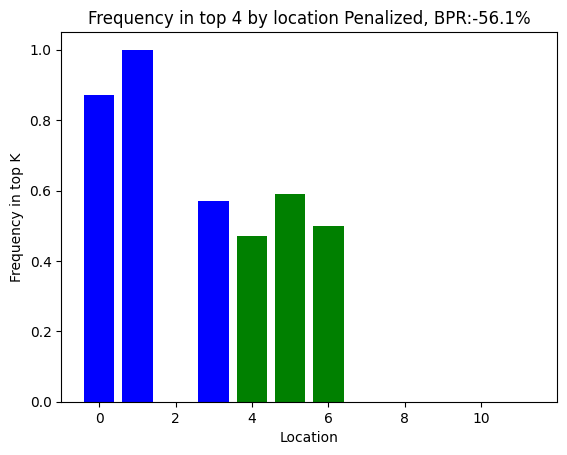

(4, 12)


/cluster/tufts/hugheslab/kheuto01/mambaforge/envs/pip_k2_tf/lib/python3.11/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


<Figure size 640x480 with 0 Axes>

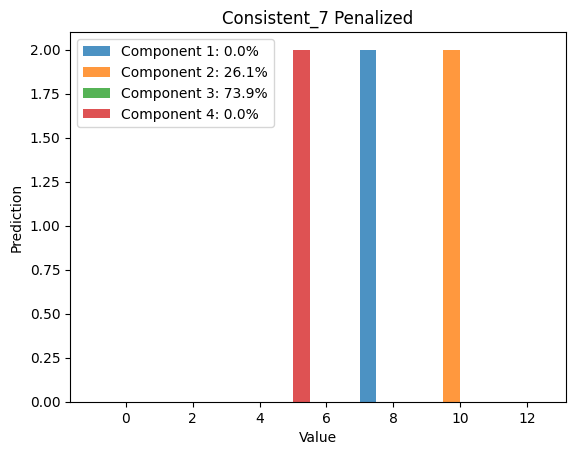

<Figure size 640x480 with 0 Axes>

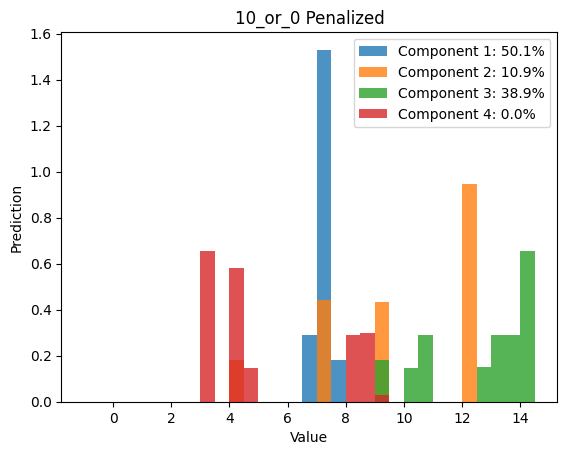

<Figure size 640x480 with 0 Axes>

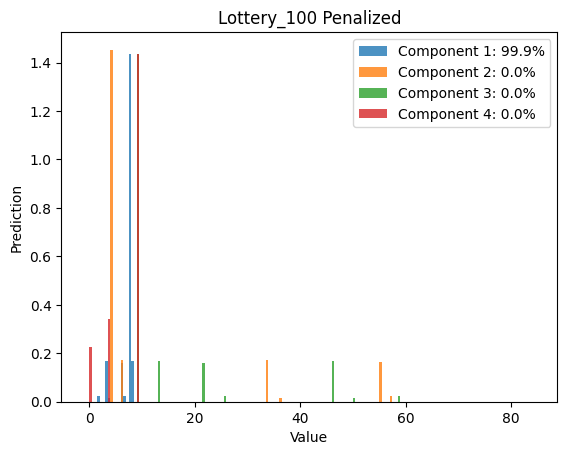

<Figure size 640x480 with 0 Axes>

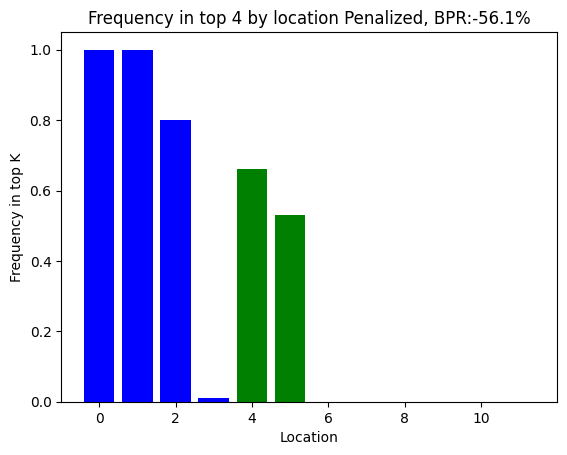

(4, 12)


<Figure size 640x480 with 0 Axes>

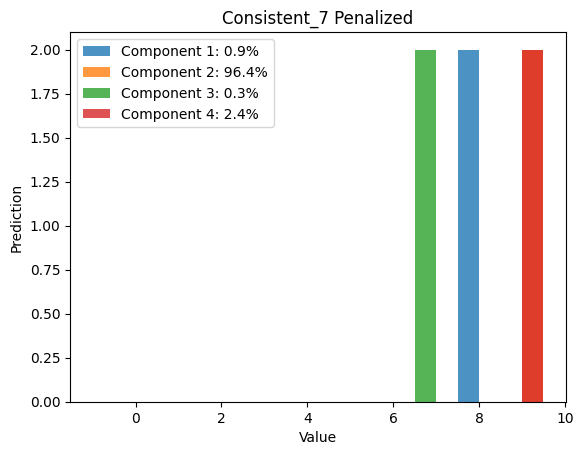

<Figure size 640x480 with 0 Axes>

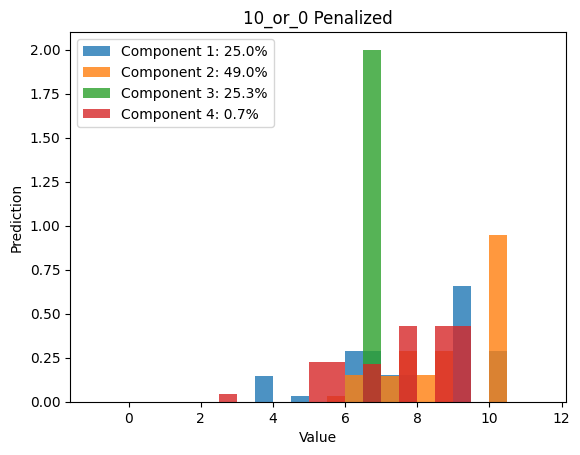

<Figure size 640x480 with 0 Axes>

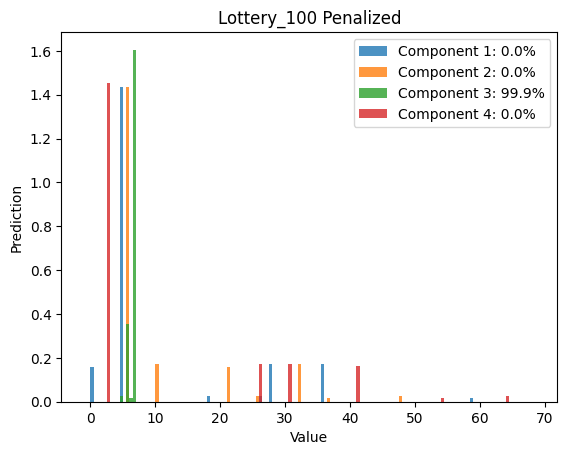

<Figure size 640x480 with 0 Axes>

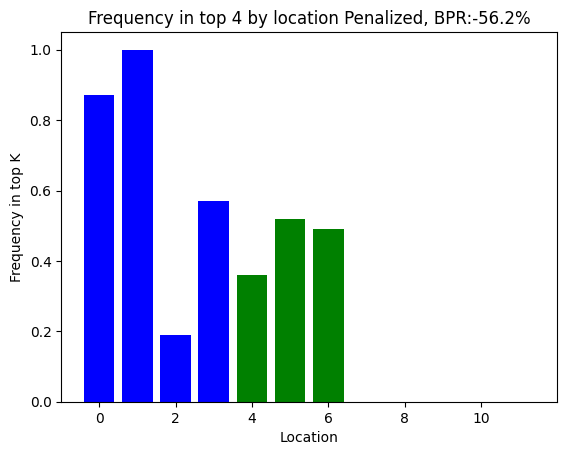

(4, 12)


<Figure size 640x480 with 0 Axes>

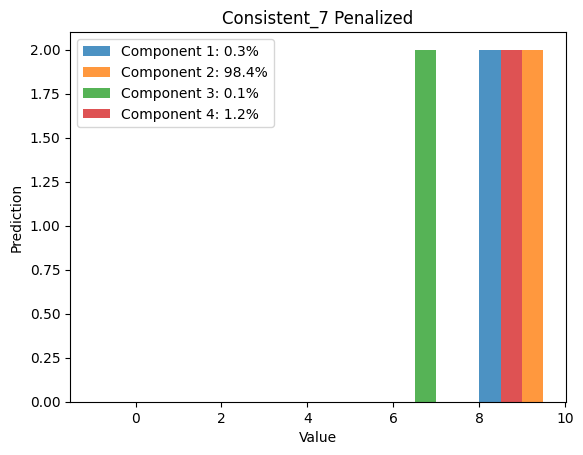

<Figure size 640x480 with 0 Axes>

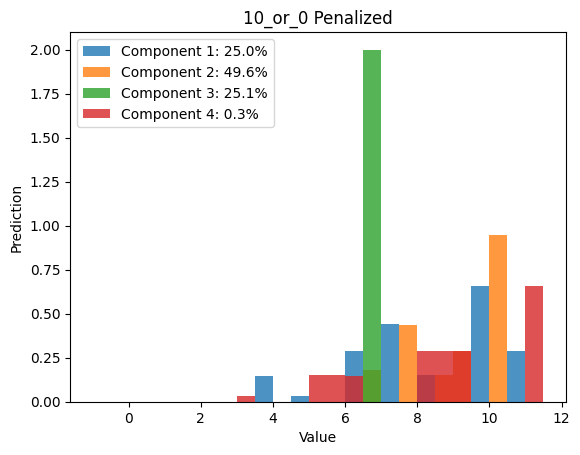

<Figure size 640x480 with 0 Axes>

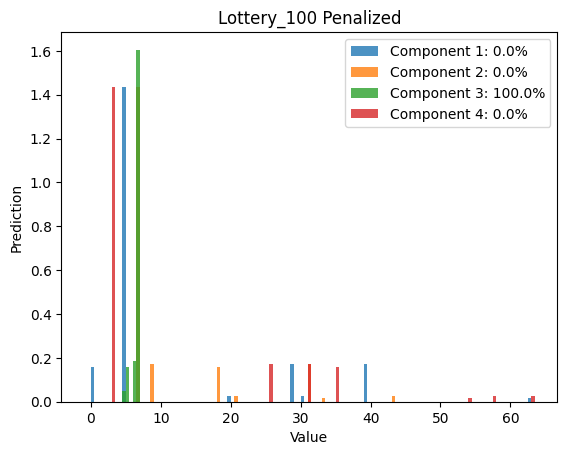

<Figure size 640x480 with 0 Axes>

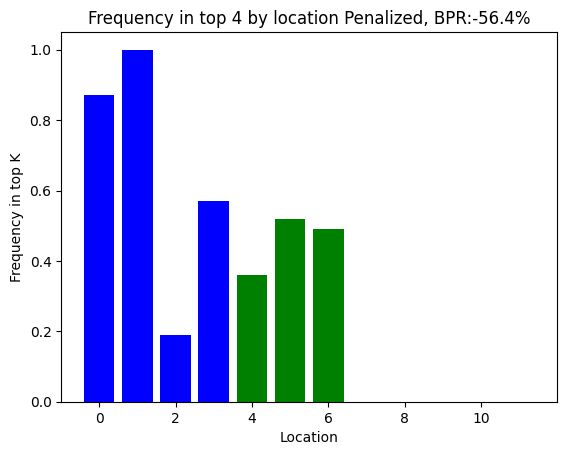

(4, 12)


<Figure size 640x480 with 0 Axes>

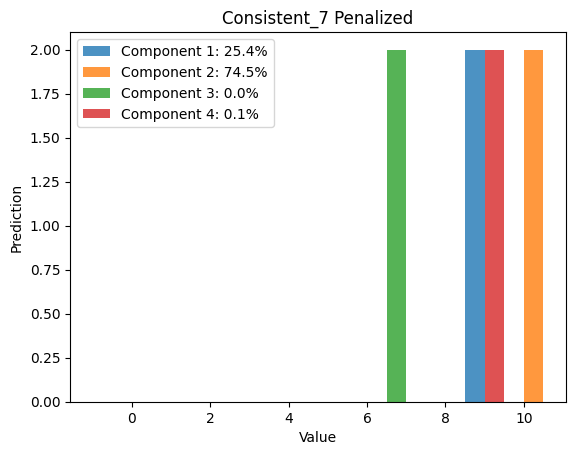

<Figure size 640x480 with 0 Axes>

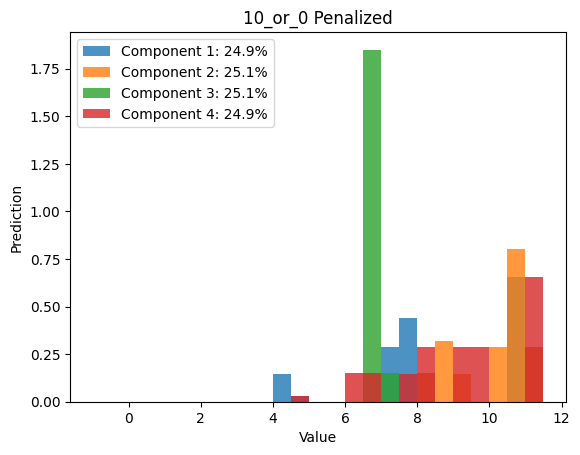

<Figure size 640x480 with 0 Axes>

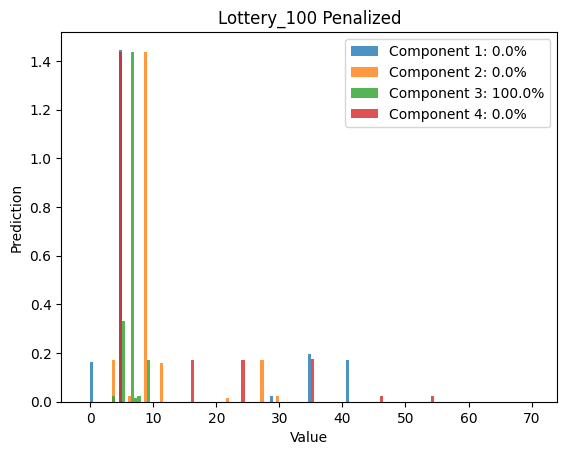

<Figure size 640x480 with 0 Axes>

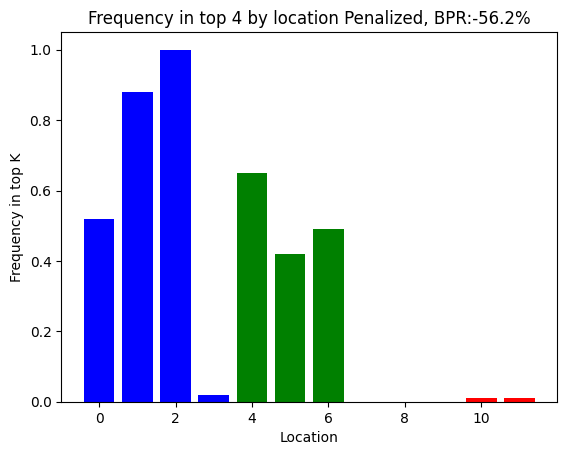

(4, 12)


/cluster/tufts/hugheslab/kheuto01/mambaforge/envs/pip_k2_tf/lib/python3.11/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


<Figure size 640x480 with 0 Axes>

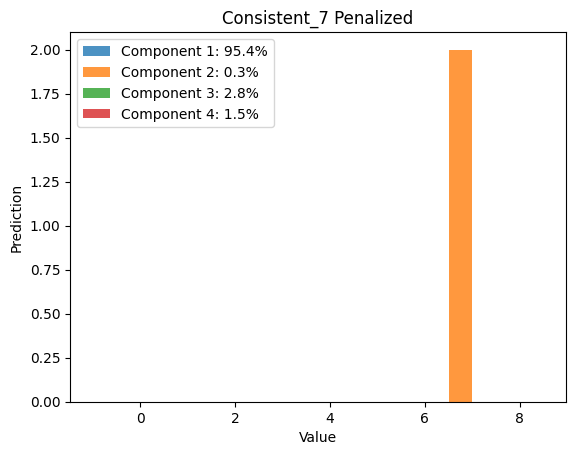

<Figure size 640x480 with 0 Axes>

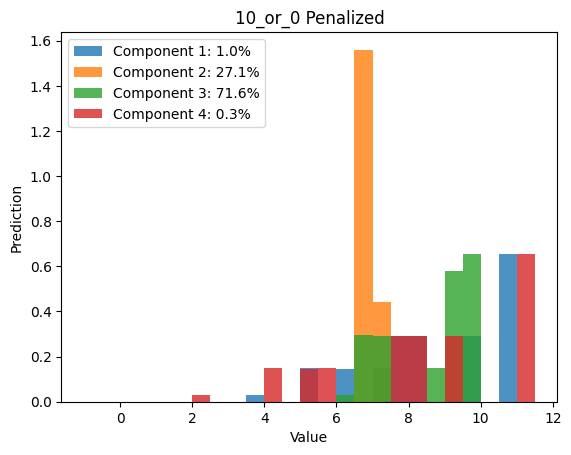

<Figure size 640x480 with 0 Axes>

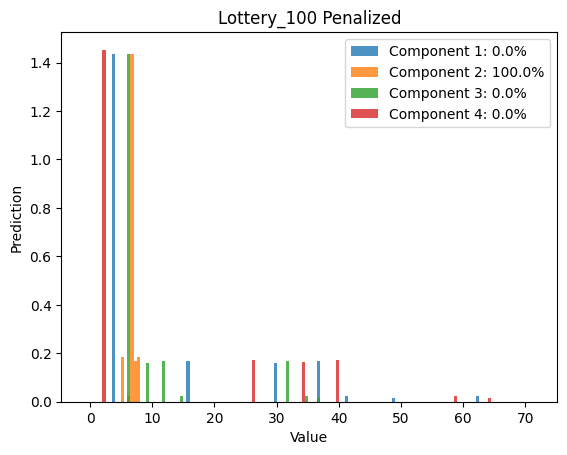

<Figure size 640x480 with 0 Axes>

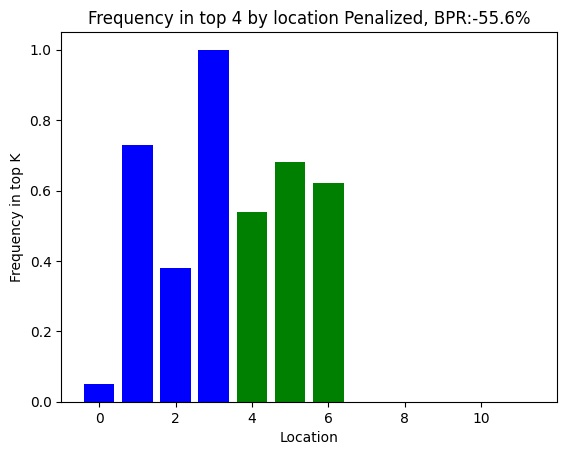

(4, 12)


/cluster/tufts/hugheslab/kheuto01/mambaforge/envs/pip_k2_tf/lib/python3.11/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


<Figure size 640x480 with 0 Axes>

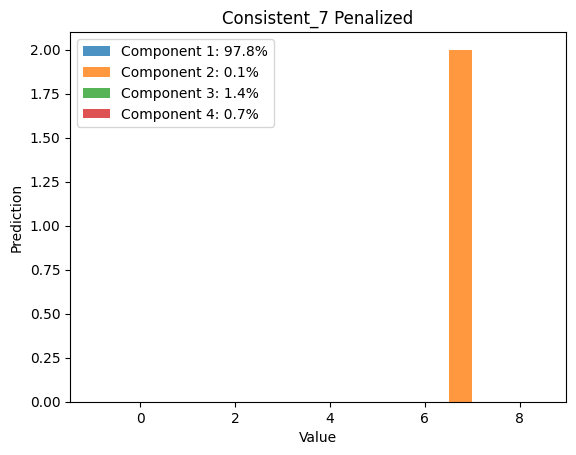

<Figure size 640x480 with 0 Axes>

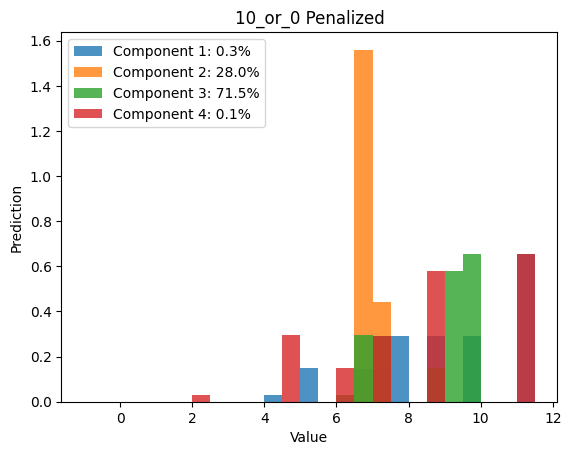

<Figure size 640x480 with 0 Axes>

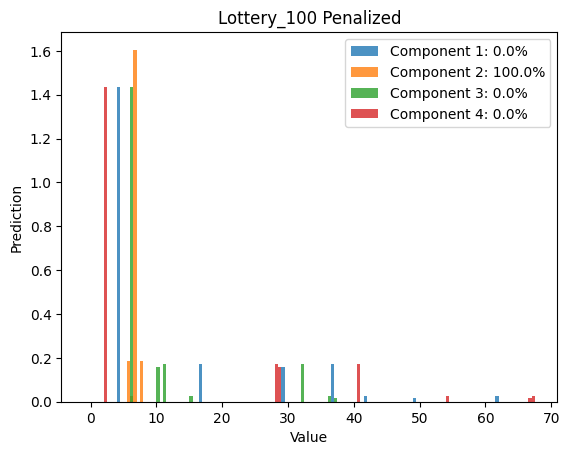

<Figure size 640x480 with 0 Axes>

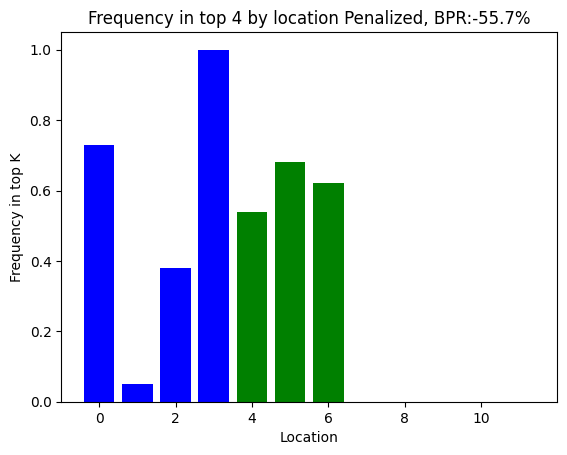

(4, 12)


/cluster/tufts/hugheslab/kheuto01/mambaforge/envs/pip_k2_tf/lib/python3.11/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


<Figure size 640x480 with 0 Axes>

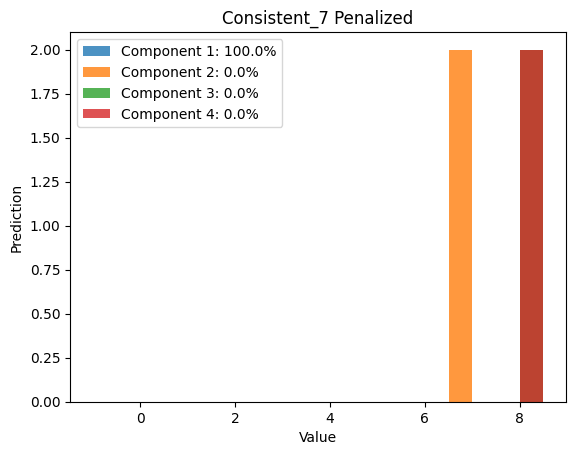

<Figure size 640x480 with 0 Axes>

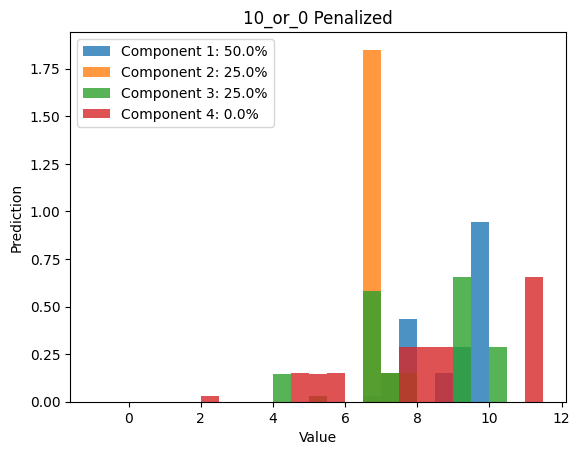

<Figure size 640x480 with 0 Axes>

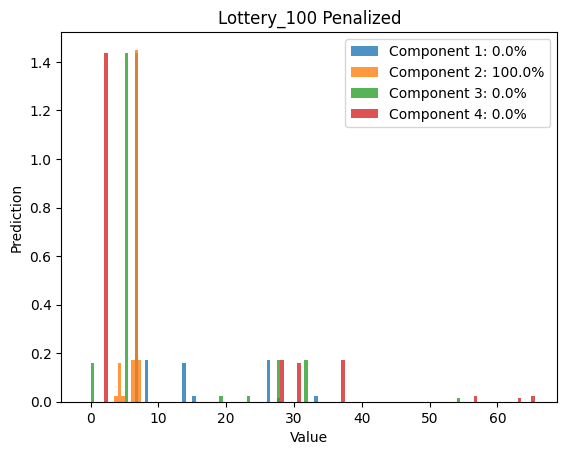

<Figure size 640x480 with 0 Axes>

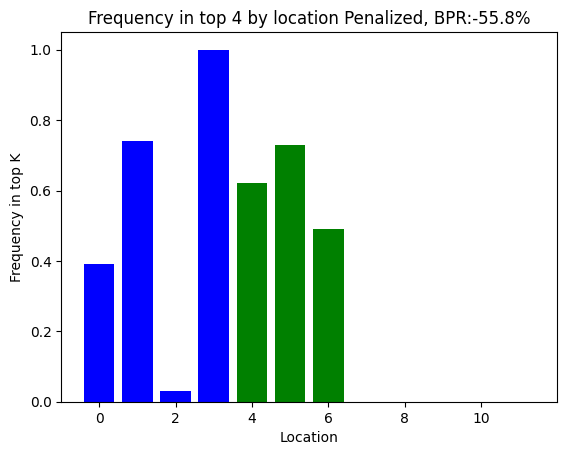

(4, 12)


/cluster/tufts/hugheslab/kheuto01/mambaforge/envs/pip_k2_tf/lib/python3.11/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


<Figure size 640x480 with 0 Axes>

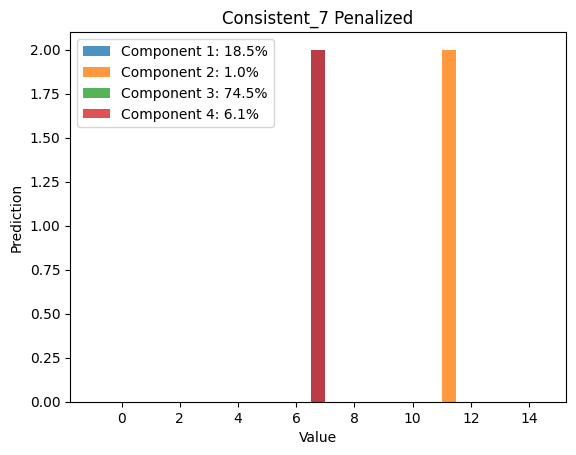

<Figure size 640x480 with 0 Axes>

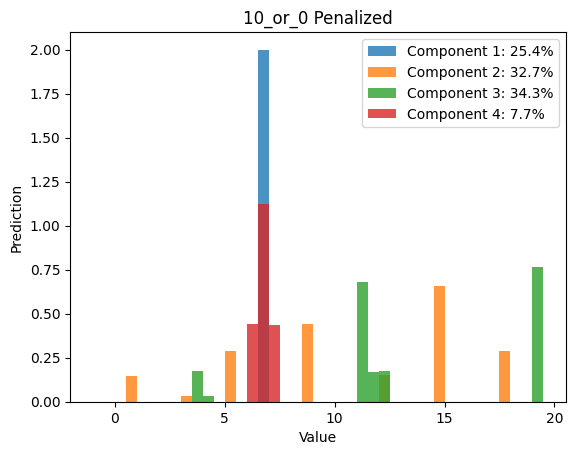

<Figure size 640x480 with 0 Axes>

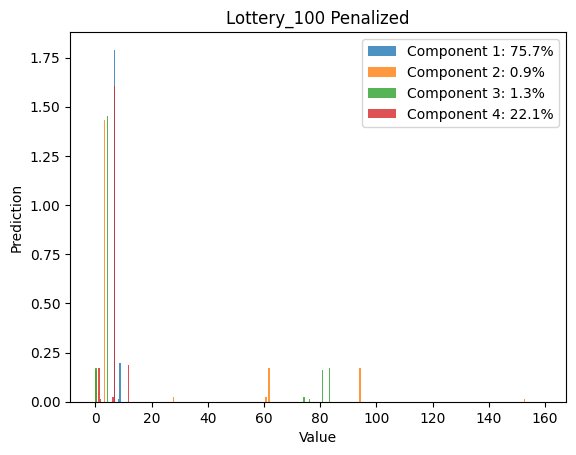

<Figure size 640x480 with 0 Axes>

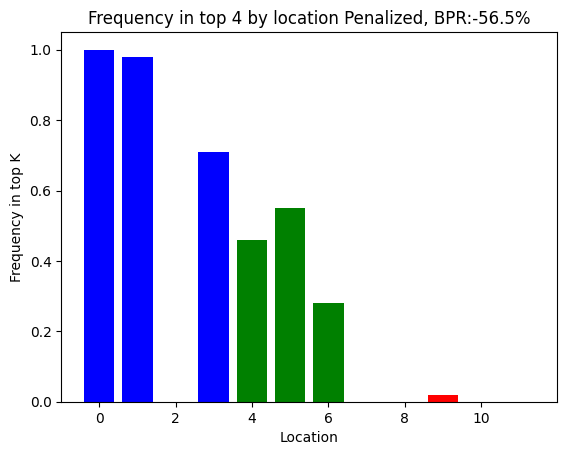

(4, 12)


/cluster/tufts/hugheslab/kheuto01/mambaforge/envs/pip_k2_tf/lib/python3.11/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


<Figure size 640x480 with 0 Axes>

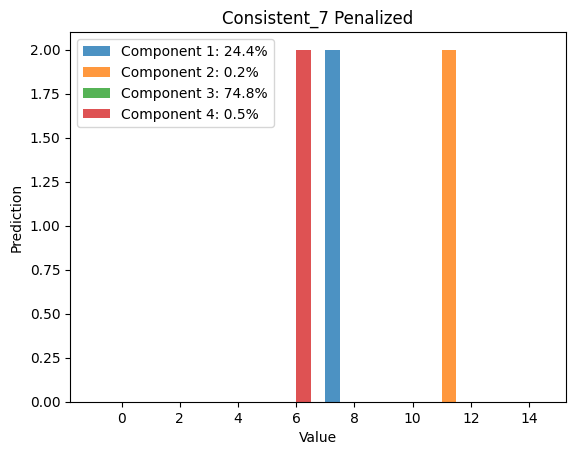

<Figure size 640x480 with 0 Axes>

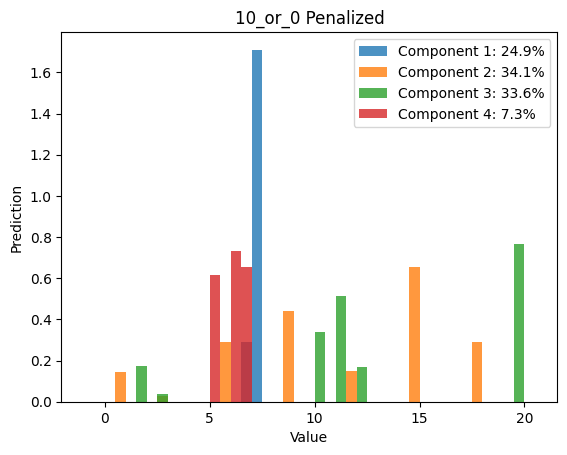

<Figure size 640x480 with 0 Axes>

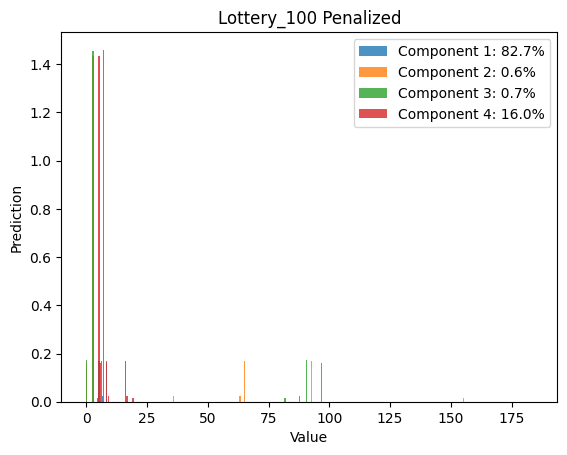

<Figure size 640x480 with 0 Axes>

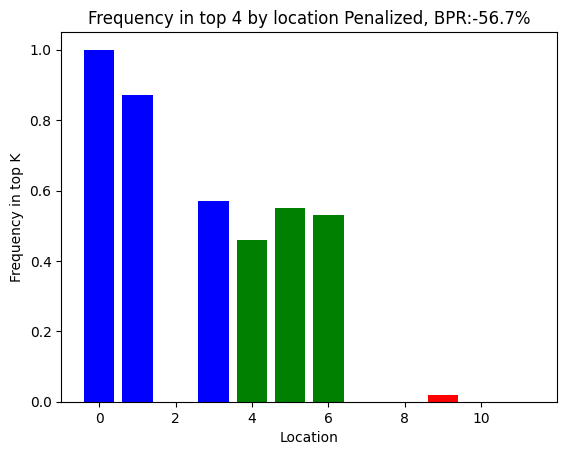

(4, 12)


<Figure size 640x480 with 0 Axes>

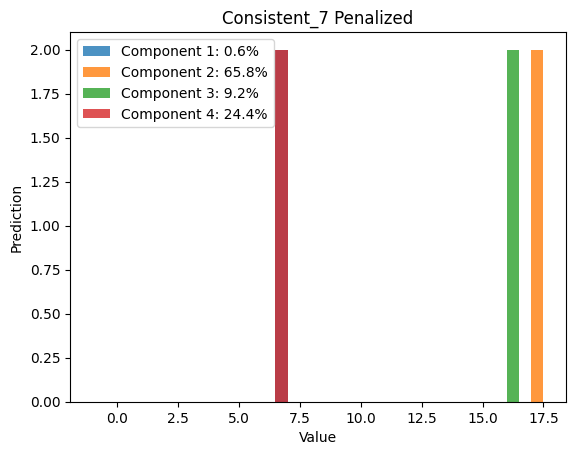

<Figure size 640x480 with 0 Axes>

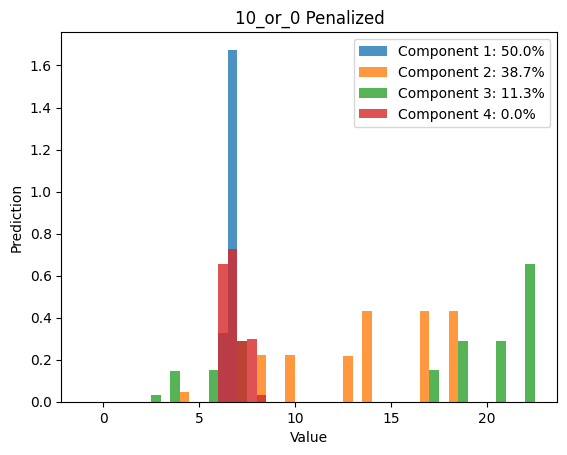

<Figure size 640x480 with 0 Axes>

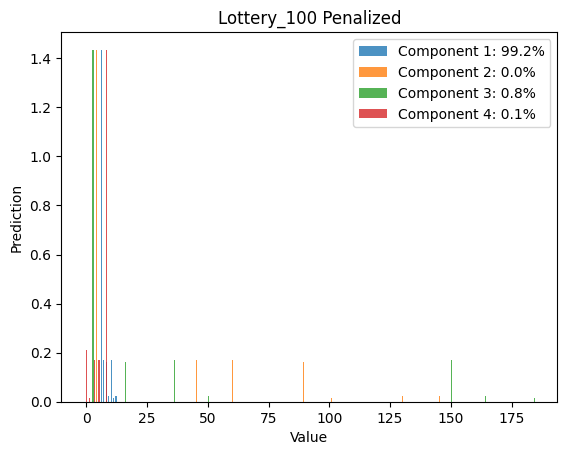

<Figure size 640x480 with 0 Axes>

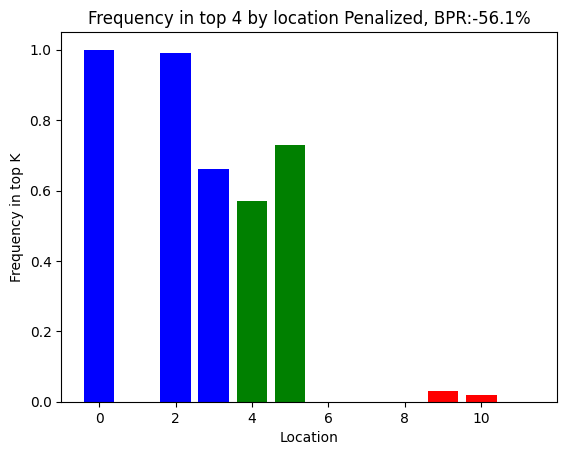

(4, 12)


/cluster/tufts/hugheslab/kheuto01/mambaforge/envs/pip_k2_tf/lib/python3.11/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


<Figure size 640x480 with 0 Axes>

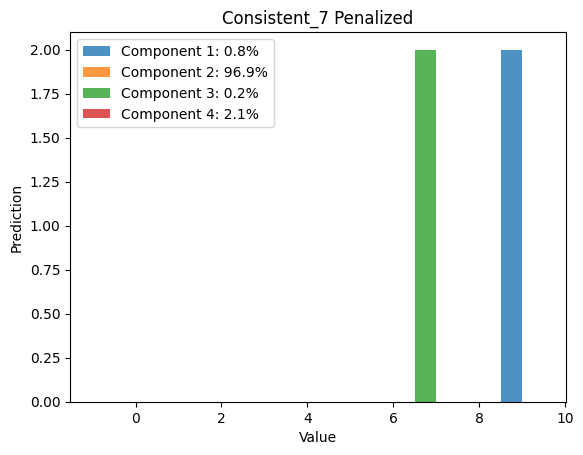

<Figure size 640x480 with 0 Axes>

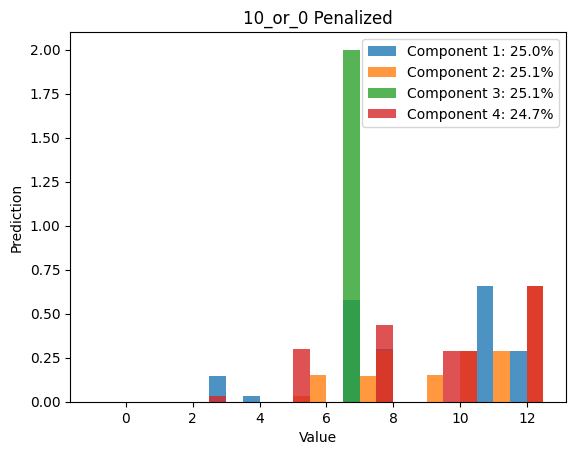

<Figure size 640x480 with 0 Axes>

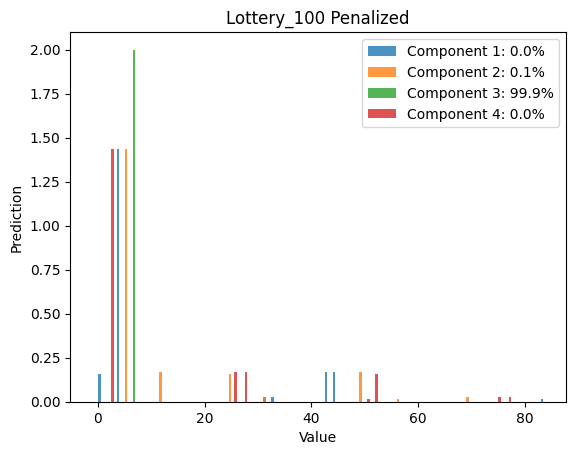

<Figure size 640x480 with 0 Axes>

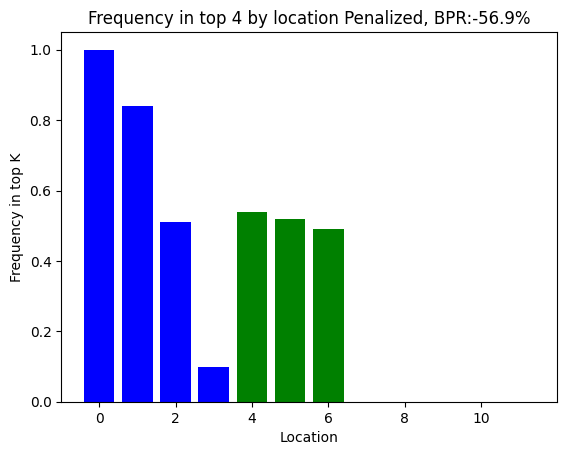

(4, 12)


/cluster/tufts/hugheslab/kheuto01/mambaforge/envs/pip_k2_tf/lib/python3.11/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


<Figure size 640x480 with 0 Axes>

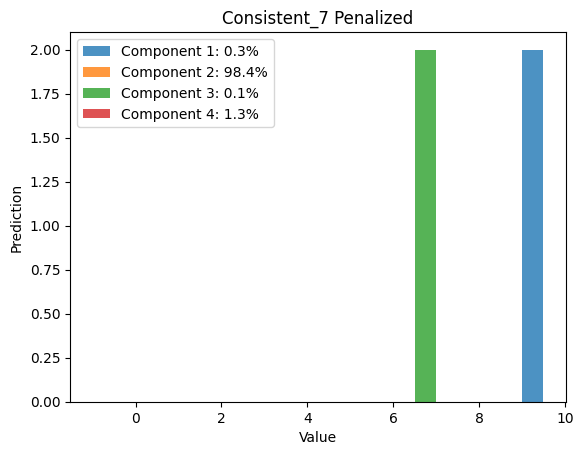

<Figure size 640x480 with 0 Axes>

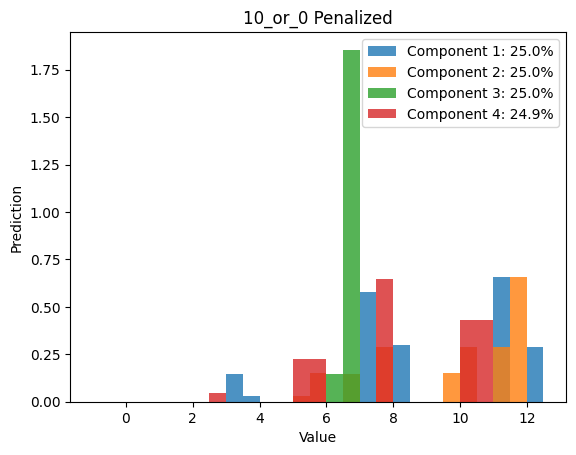

<Figure size 640x480 with 0 Axes>

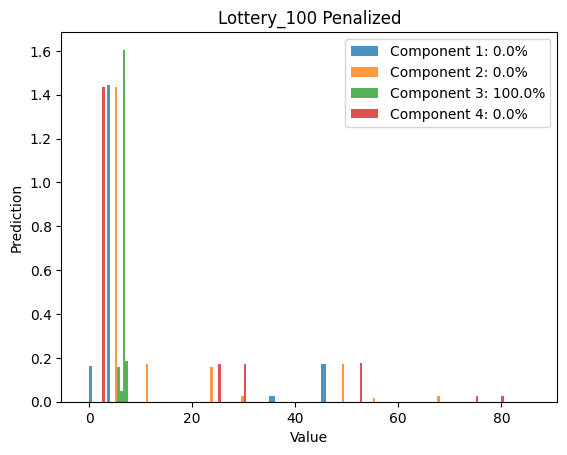

<Figure size 640x480 with 0 Axes>

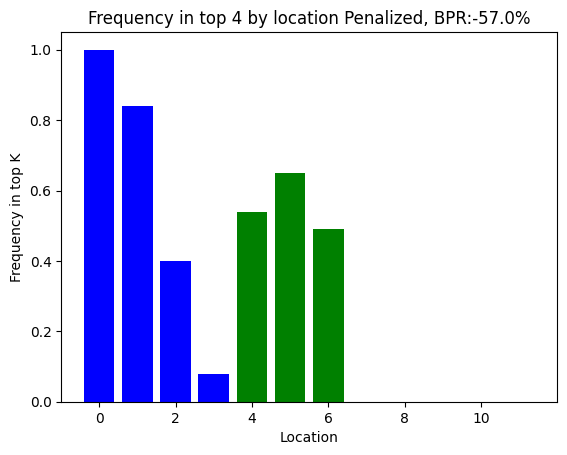

(4, 12)


<Figure size 640x480 with 0 Axes>

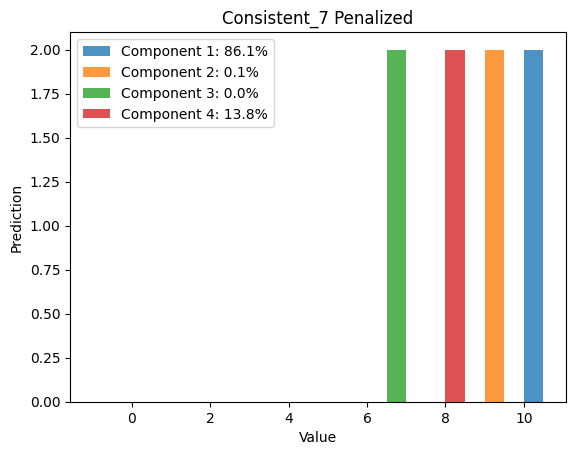

<Figure size 640x480 with 0 Axes>

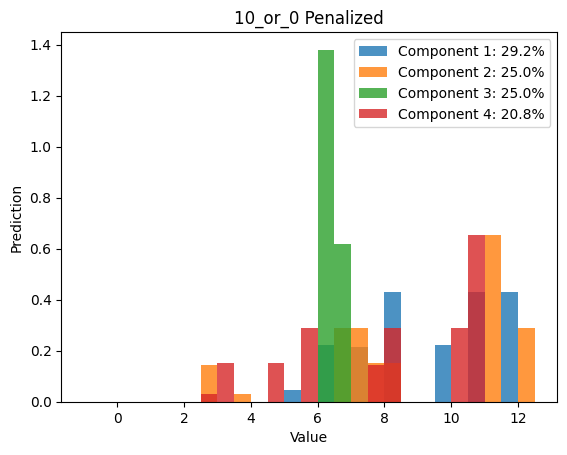

<Figure size 640x480 with 0 Axes>

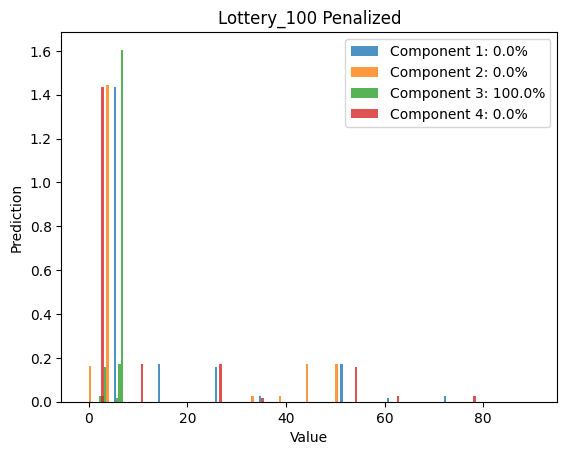

<Figure size 640x480 with 0 Axes>

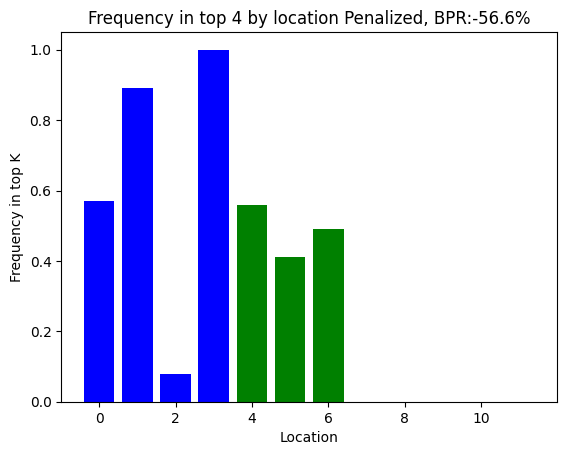

(4, 12)


/cluster/tufts/hugheslab/kheuto01/mambaforge/envs/pip_k2_tf/lib/python3.11/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


<Figure size 640x480 with 0 Axes>

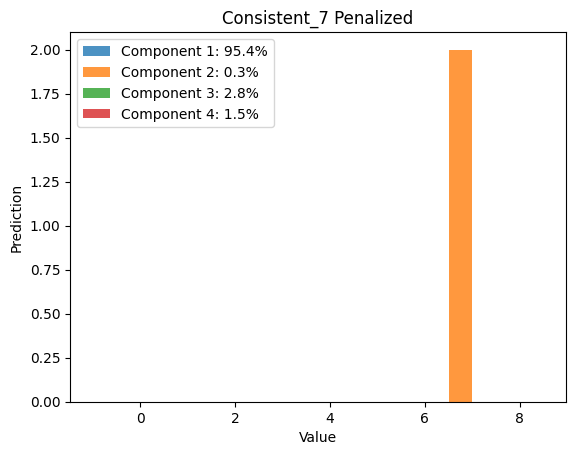

<Figure size 640x480 with 0 Axes>

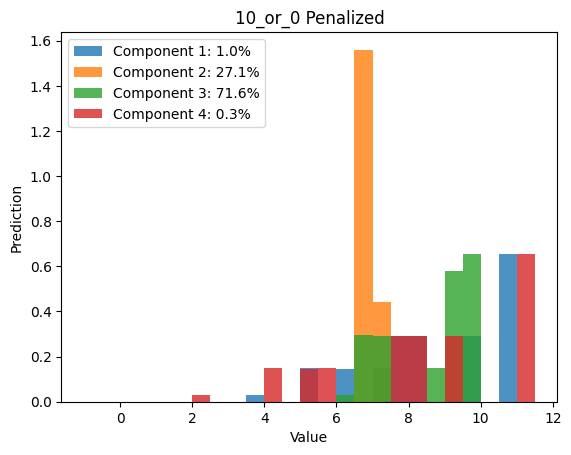

<Figure size 640x480 with 0 Axes>

KeyboardInterrupt: 

In [94]:
nlls_p = []
bprs_p = []
for model_path in penalized_models:
    model_dir = os.path.dirname(model_path)

    model = keras.models.load_model(model_path)
    y_preds = model(val_X_THS)

    nll = mixture_poi_loss(val_y_TS, y_preds)
    bpr = mix_bpr(val_y_TS, y_preds, negative_bpr_K_func=negative_bpr_K)
    plot_component_histograms(y_preds, title_add='Penalized',
                               save_dir=model_dir, file_add='penalized')
    # format bpr as percentage
    plot_winners(y_preds, K, title_add=f'Penalized, BPR:{-bpr*100:.1f}%',
                               save_dir=model_dir, file_add='penalized')


    nlls_p.append(tf.reduce_mean(nll))
    bprs_p.append(bpr)



(4, 12)


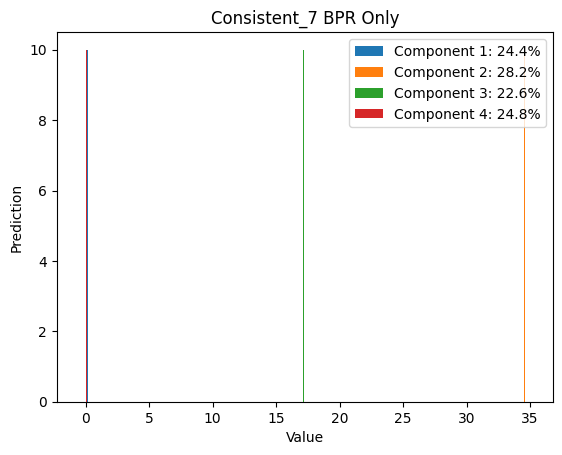

<Figure size 640x480 with 0 Axes>

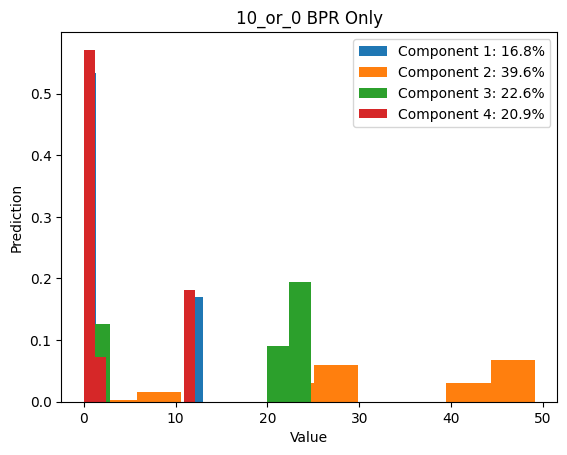

<Figure size 640x480 with 0 Axes>

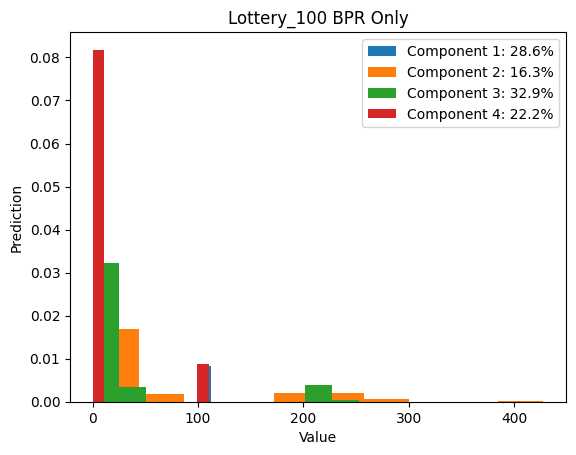

(4, 12)


<Figure size 640x480 with 0 Axes>

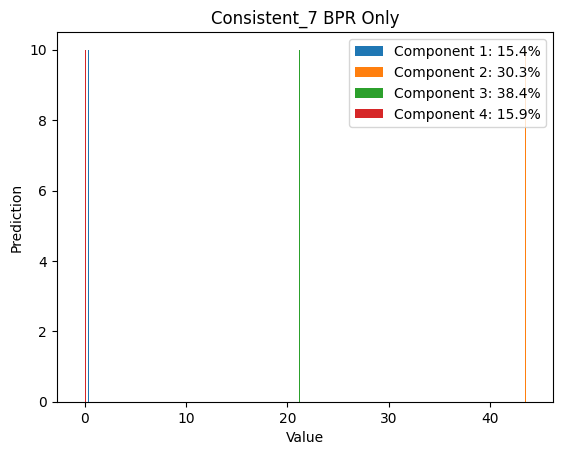

<Figure size 640x480 with 0 Axes>

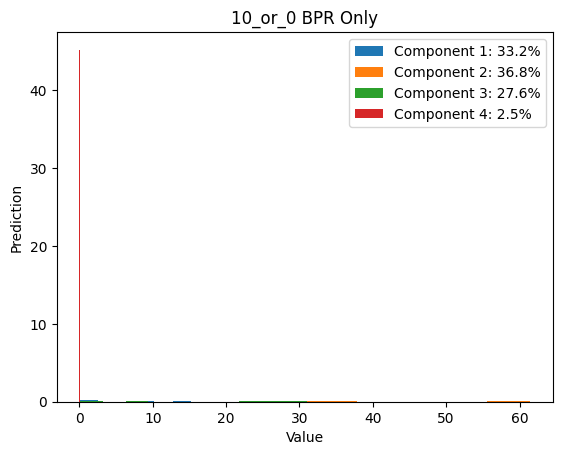

<Figure size 640x480 with 0 Axes>

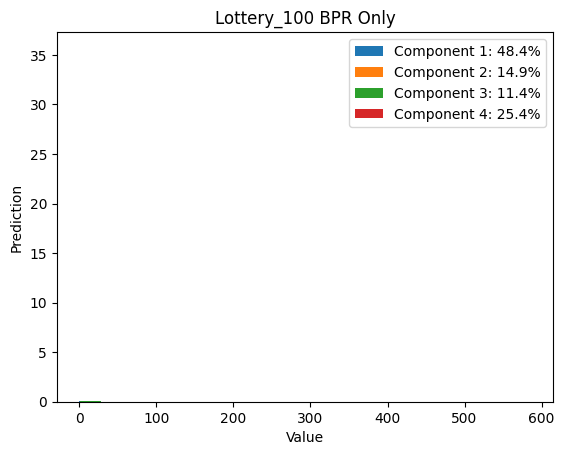

(4, 12)


<Figure size 640x480 with 0 Axes>

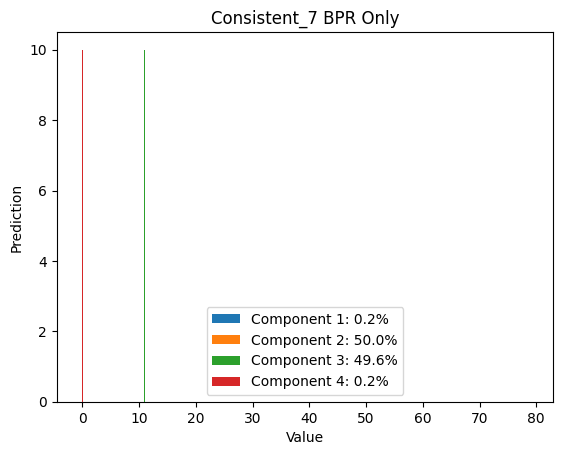

<Figure size 640x480 with 0 Axes>

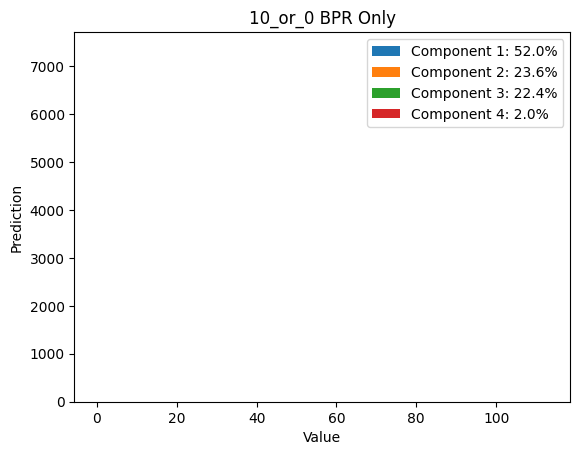

<Figure size 640x480 with 0 Axes>

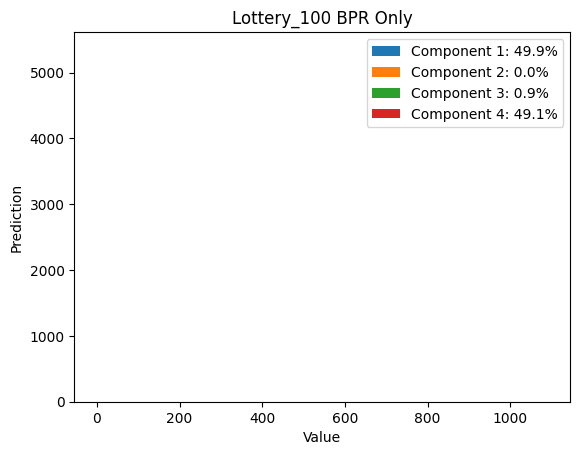

(4, 12)


<Figure size 640x480 with 0 Axes>

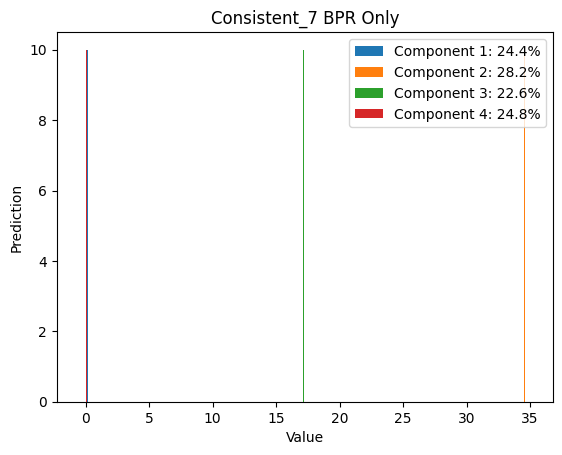

<Figure size 640x480 with 0 Axes>

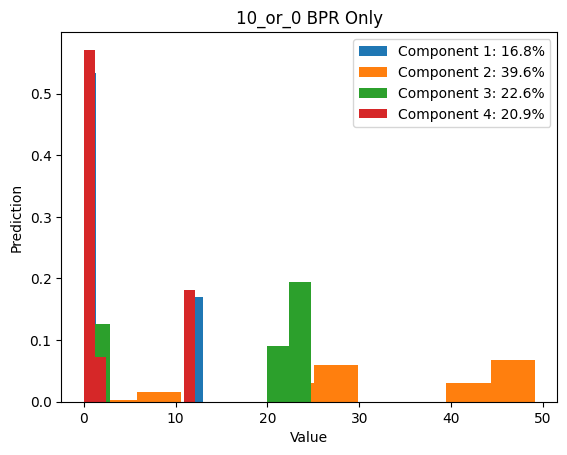

<Figure size 640x480 with 0 Axes>

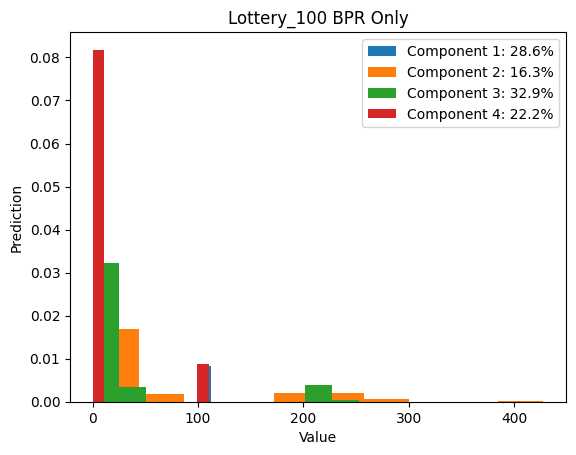

(4, 12)


<Figure size 640x480 with 0 Axes>

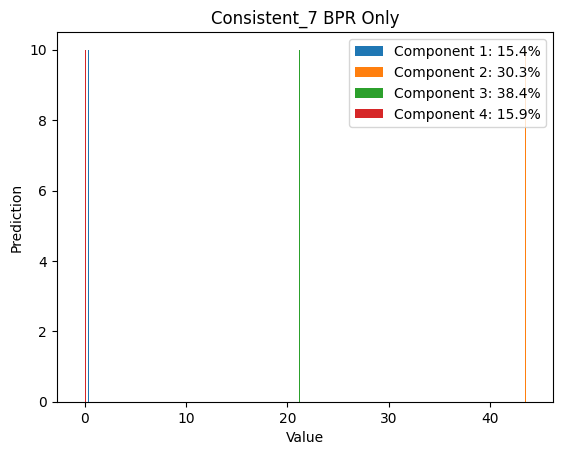

<Figure size 640x480 with 0 Axes>

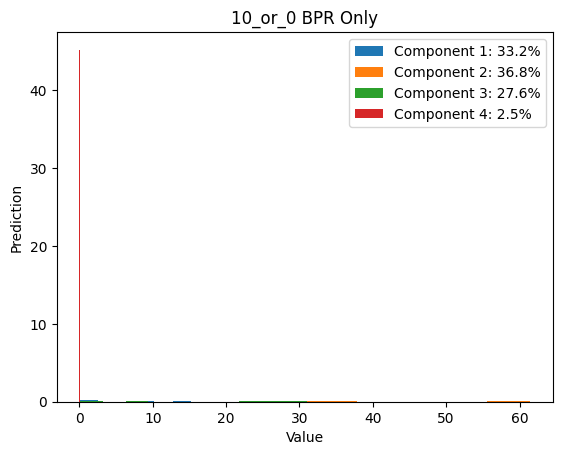

<Figure size 640x480 with 0 Axes>

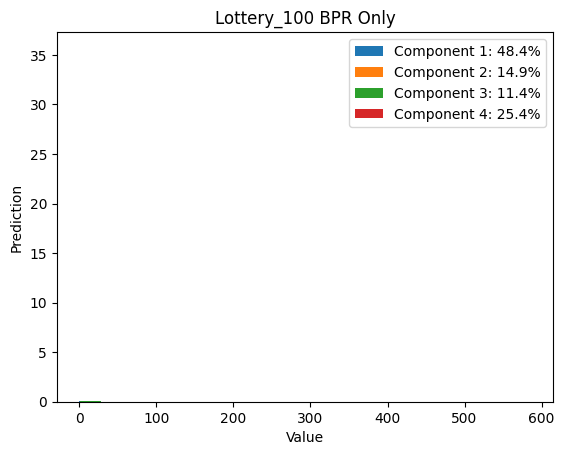

(4, 12)


<Figure size 640x480 with 0 Axes>

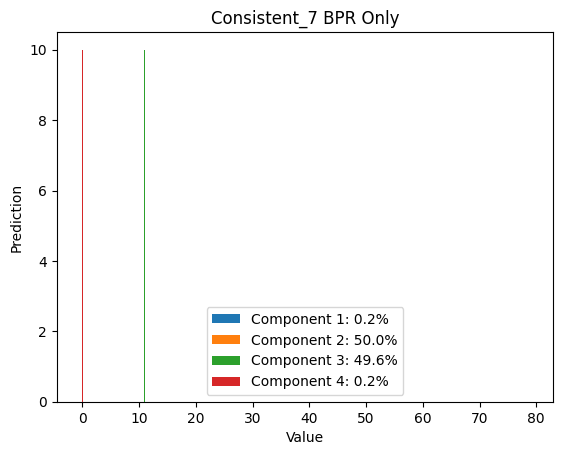

<Figure size 640x480 with 0 Axes>

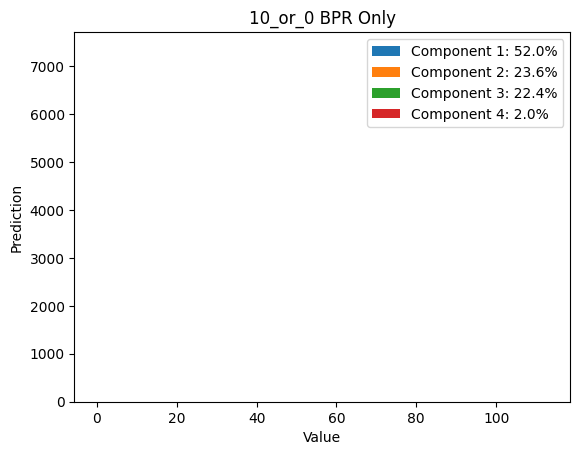

<Figure size 640x480 with 0 Axes>

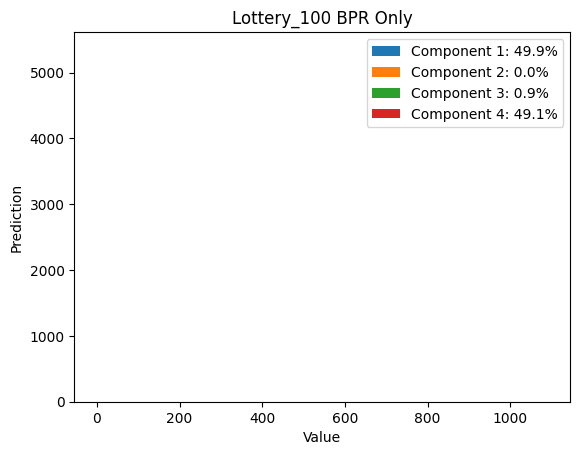

(4, 12)


<Figure size 640x480 with 0 Axes>

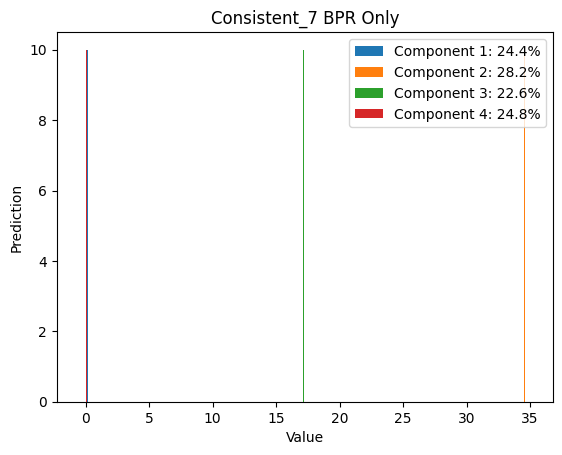

<Figure size 640x480 with 0 Axes>

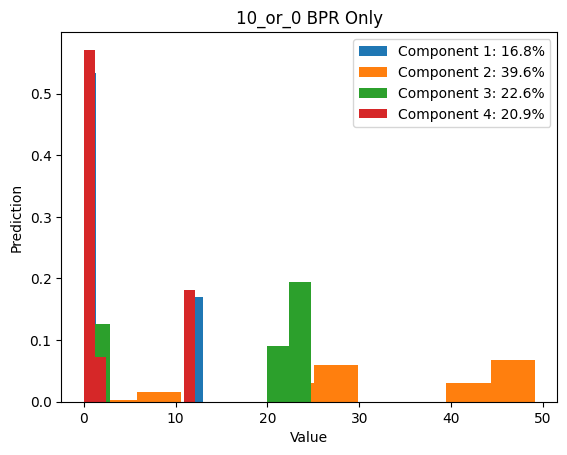

<Figure size 640x480 with 0 Axes>

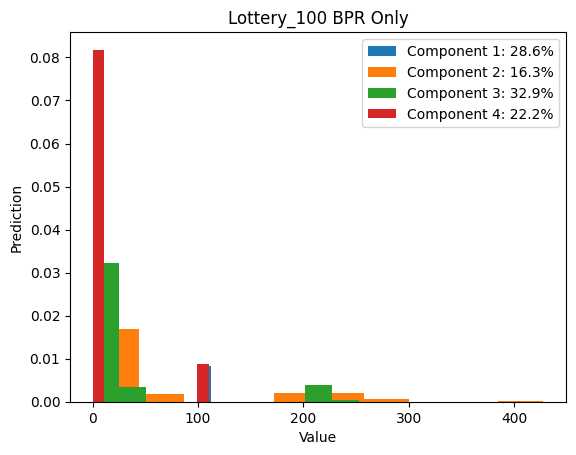

(4, 12)


<Figure size 640x480 with 0 Axes>

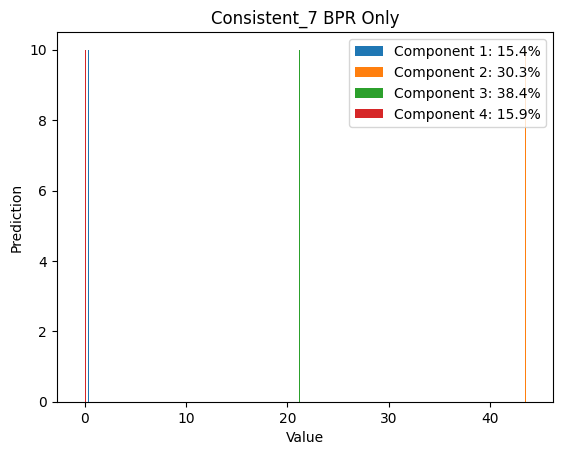

<Figure size 640x480 with 0 Axes>

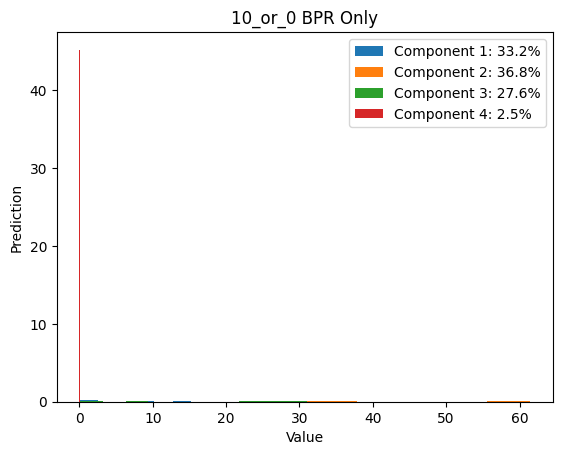

<Figure size 640x480 with 0 Axes>

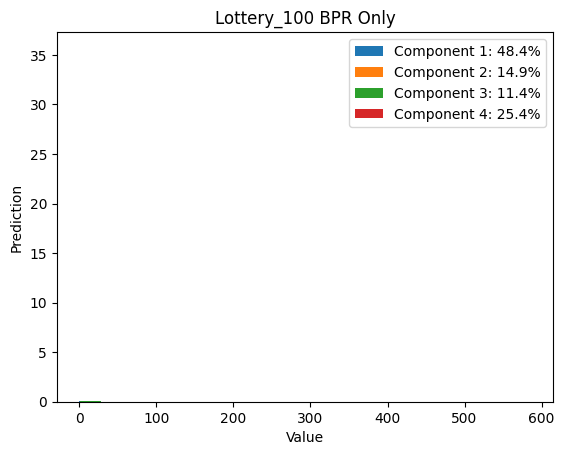

(4, 12)


<Figure size 640x480 with 0 Axes>

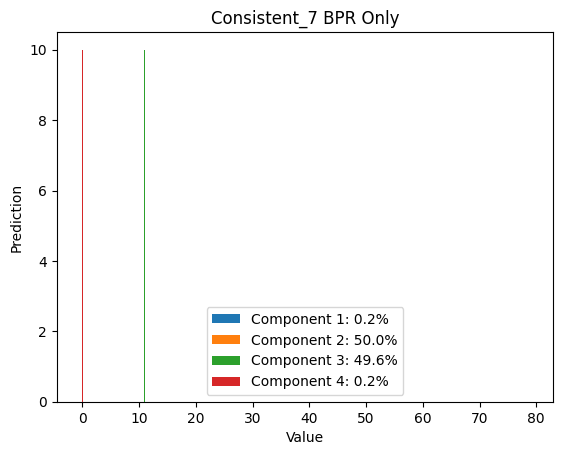

<Figure size 640x480 with 0 Axes>

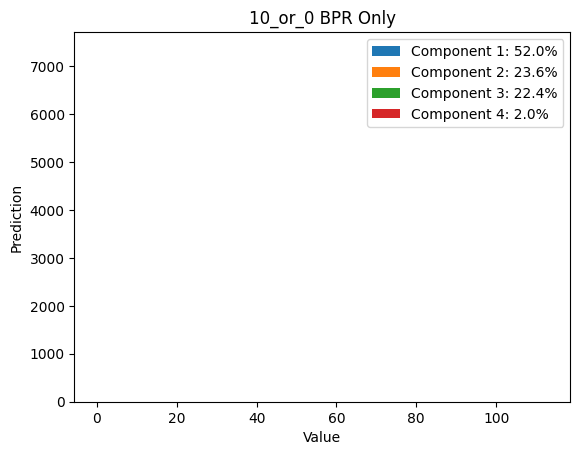

<Figure size 640x480 with 0 Axes>

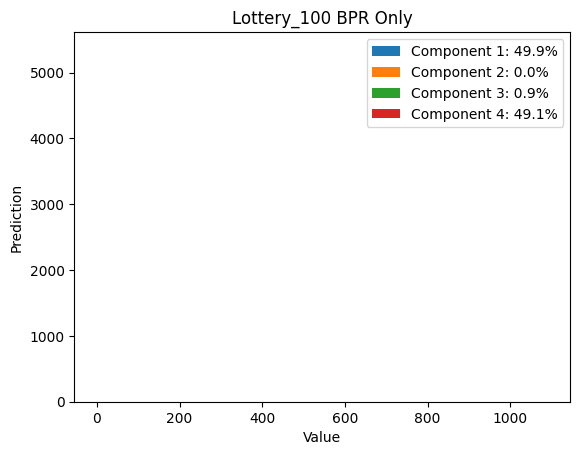

<Figure size 640x480 with 0 Axes>

In [61]:
nlls_b = []
bprs_b = []
for model_path in bpr_models:

    model = keras.models.load_model(model_path)
    y_preds = model(val_X_THS)

    nll = mixture_poi_loss(val_y_TS, y_preds)
    bpr = mix_bpr(val_y_TS, y_preds, negative_bpr_K_func=negative_bpr_K)
    plot_component_histograms(y_preds, title_add='BPR Only',
                               save_dir=model_dir, file_add='bpr')
    plot_winners(y_preds, K, title_add=f'BPR Only, BPR:{-bpr*100:.1f}%',
                               save_dir=model_dir, file_add='bpr')

    nlls_b.append(tf.reduce_mean(nll))
    bprs_b.append(bpr)



(4, 12)


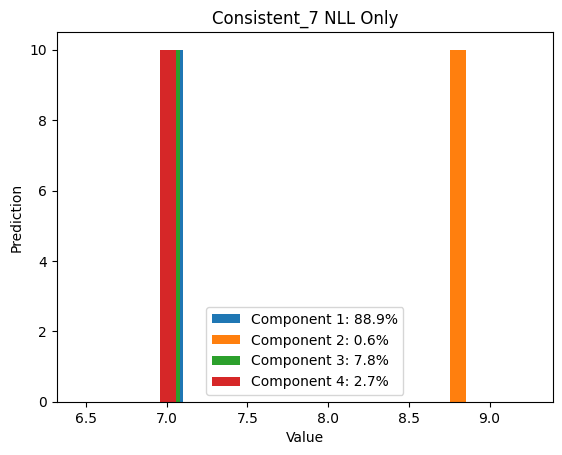

<Figure size 640x480 with 0 Axes>

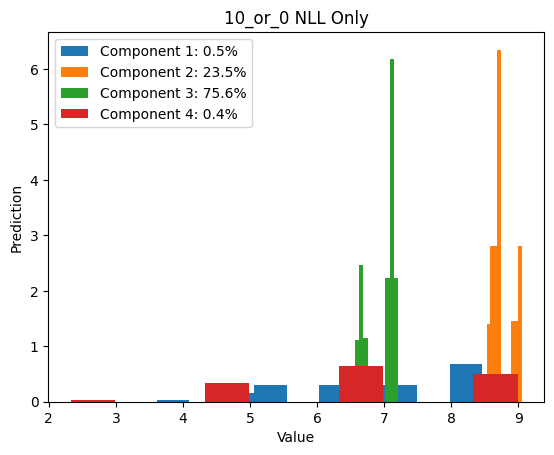

<Figure size 640x480 with 0 Axes>

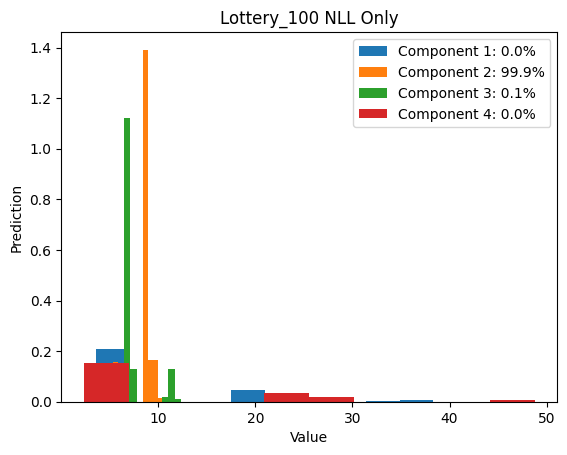

(4, 12)


<Figure size 640x480 with 0 Axes>

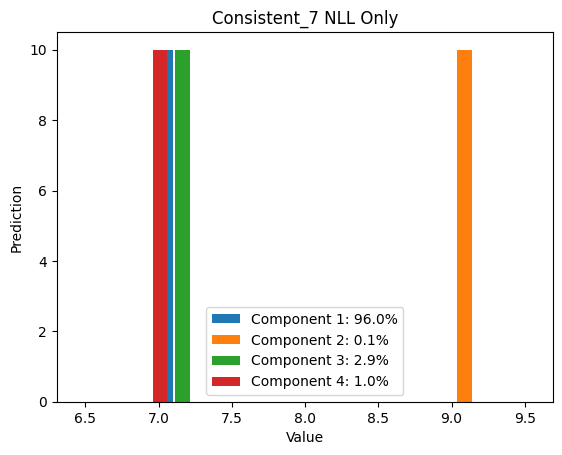

<Figure size 640x480 with 0 Axes>

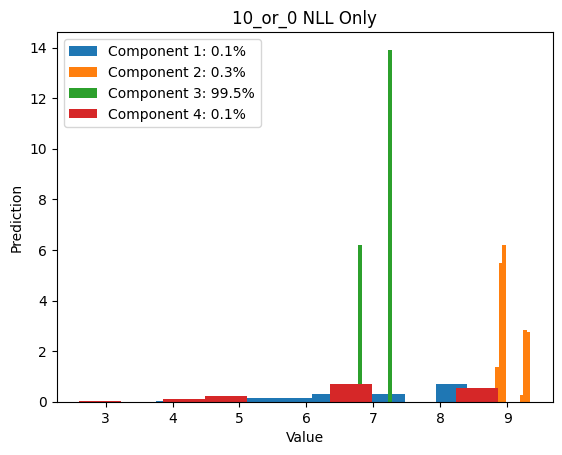

<Figure size 640x480 with 0 Axes>

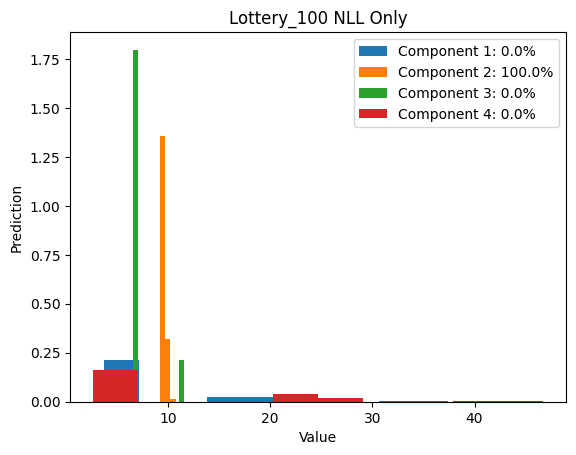

(4, 12)


<Figure size 640x480 with 0 Axes>

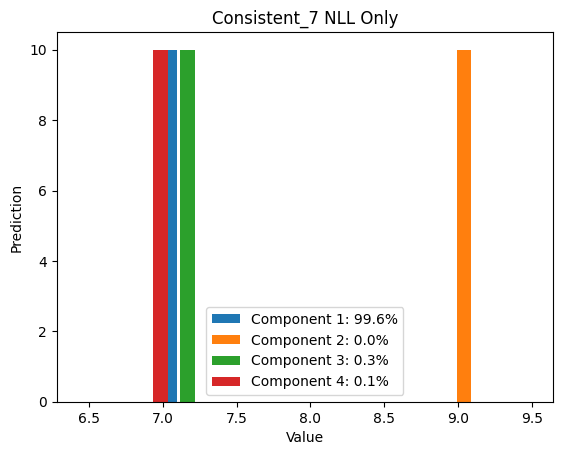

<Figure size 640x480 with 0 Axes>

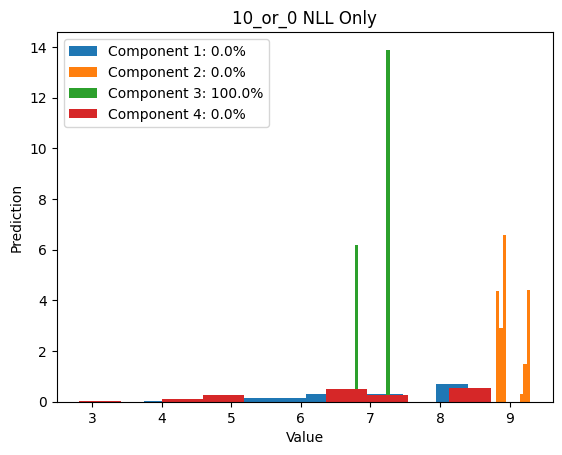

<Figure size 640x480 with 0 Axes>

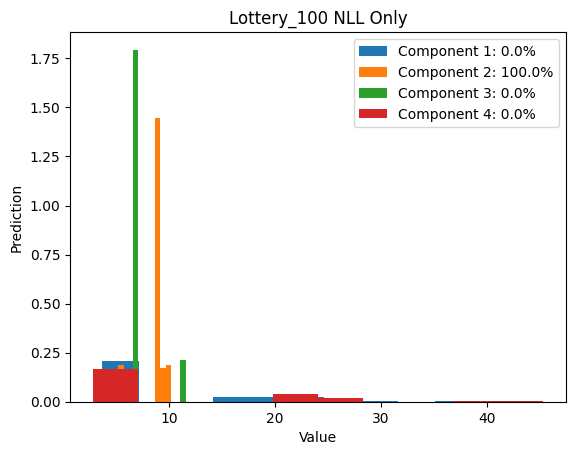

(4, 12)


<Figure size 640x480 with 0 Axes>

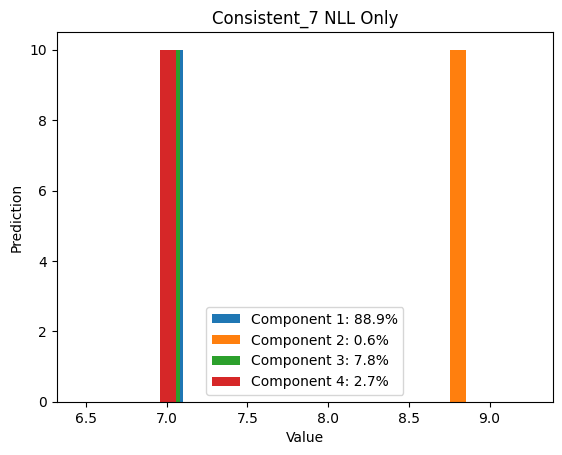

<Figure size 640x480 with 0 Axes>

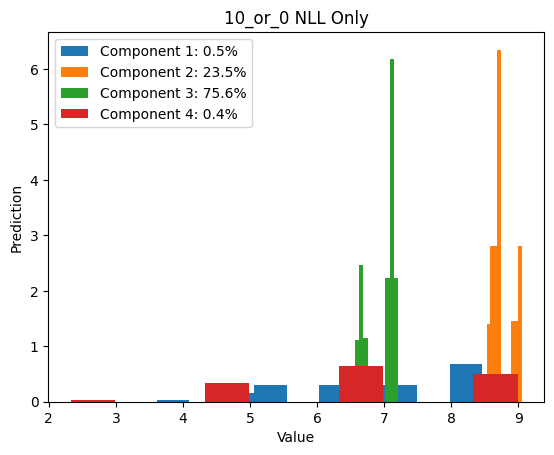

<Figure size 640x480 with 0 Axes>

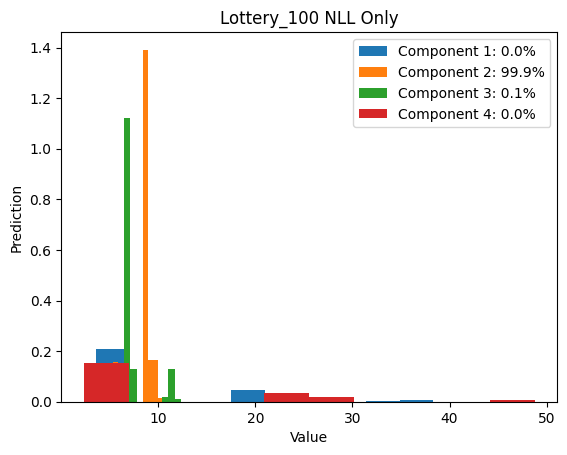

(4, 12)


<Figure size 640x480 with 0 Axes>

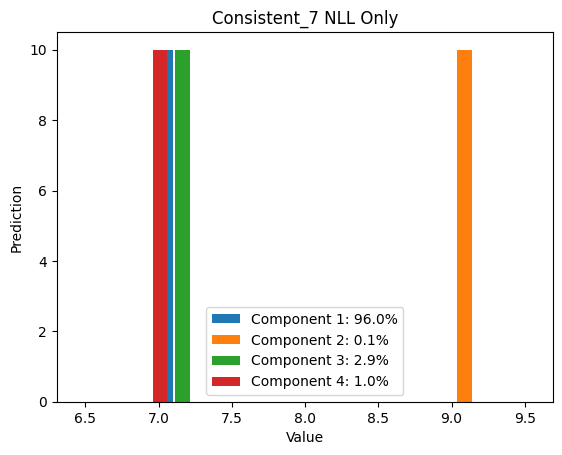

<Figure size 640x480 with 0 Axes>

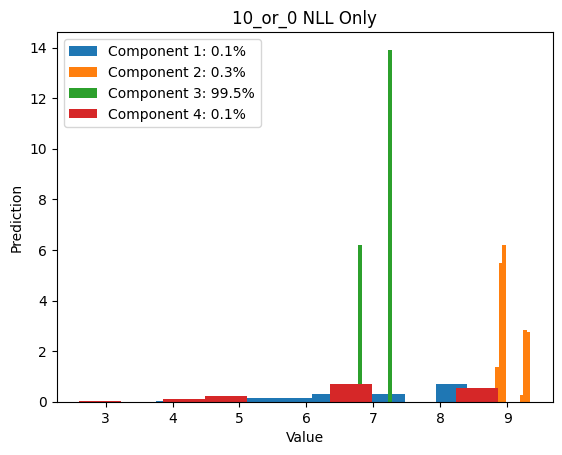

<Figure size 640x480 with 0 Axes>

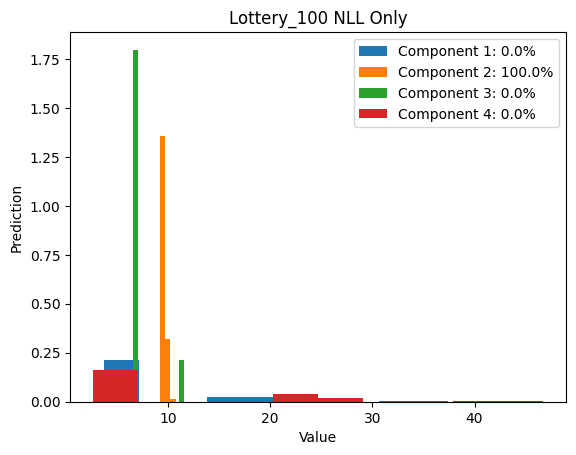

(4, 12)


<Figure size 640x480 with 0 Axes>

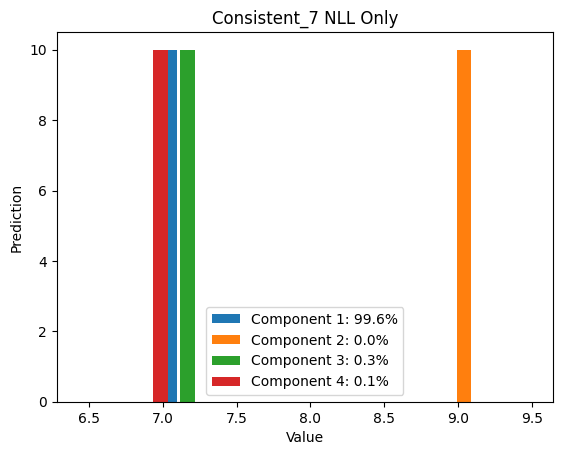

<Figure size 640x480 with 0 Axes>

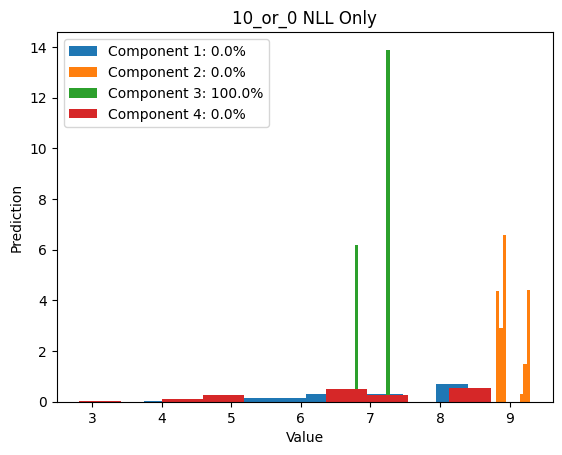

<Figure size 640x480 with 0 Axes>

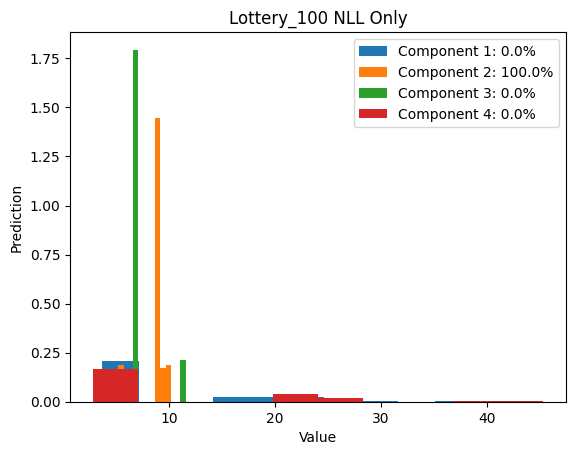

(4, 12)


<Figure size 640x480 with 0 Axes>

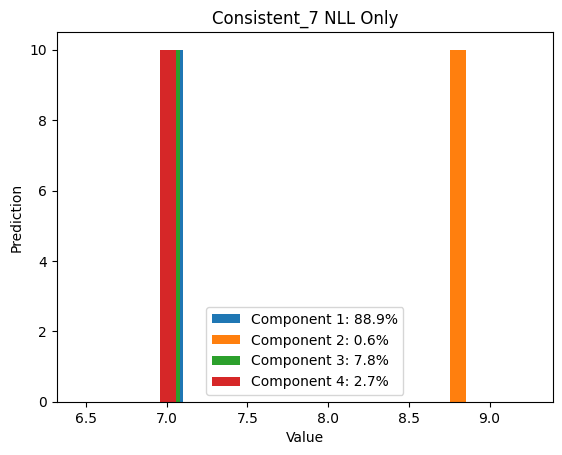

<Figure size 640x480 with 0 Axes>

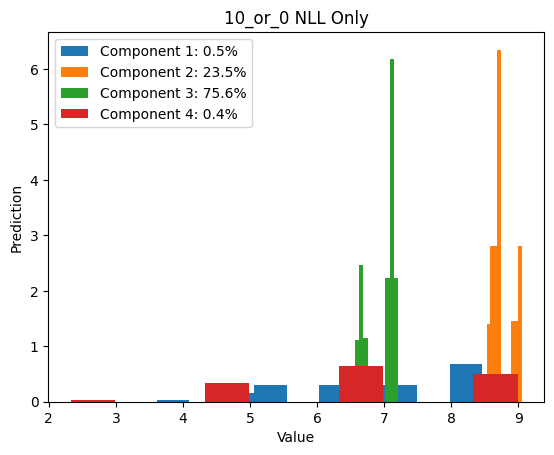

<Figure size 640x480 with 0 Axes>

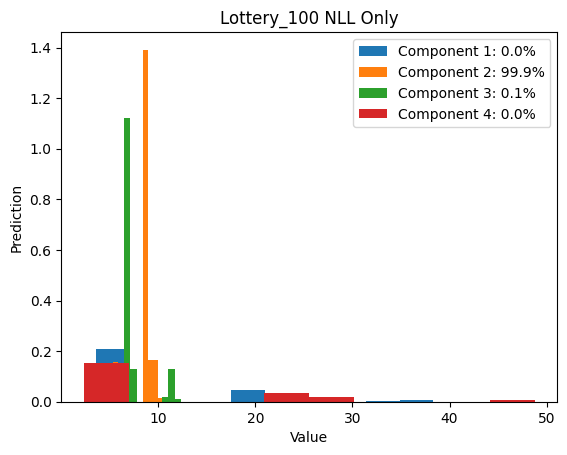

(4, 12)


<Figure size 640x480 with 0 Axes>

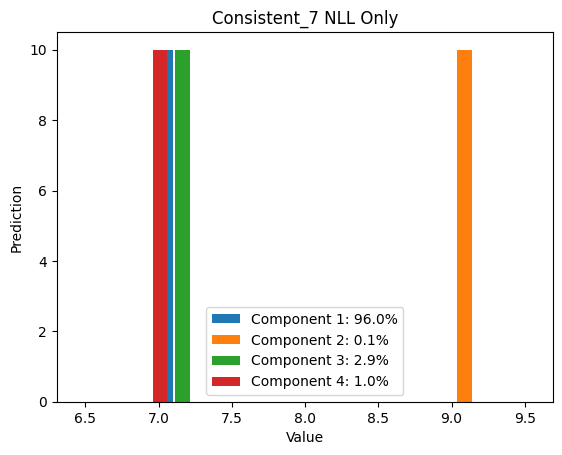

<Figure size 640x480 with 0 Axes>

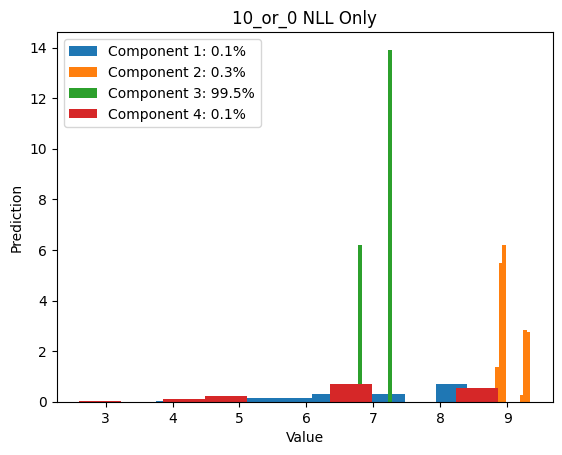

<Figure size 640x480 with 0 Axes>

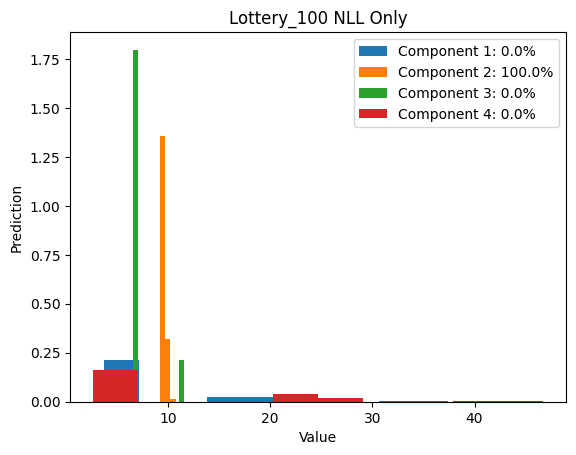

(4, 12)


<Figure size 640x480 with 0 Axes>

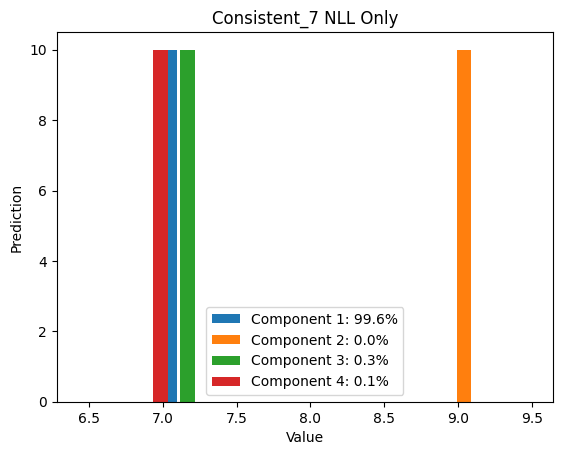

<Figure size 640x480 with 0 Axes>

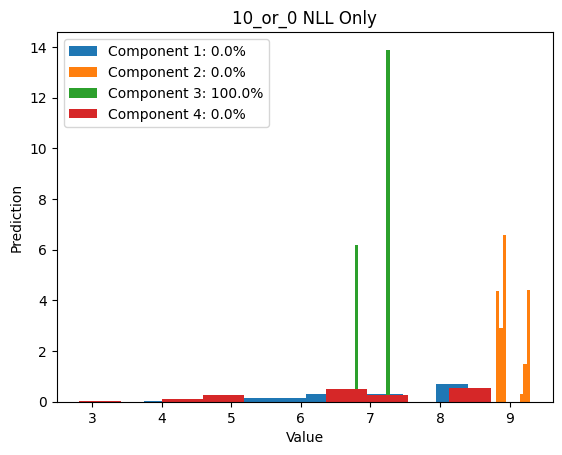

<Figure size 640x480 with 0 Axes>

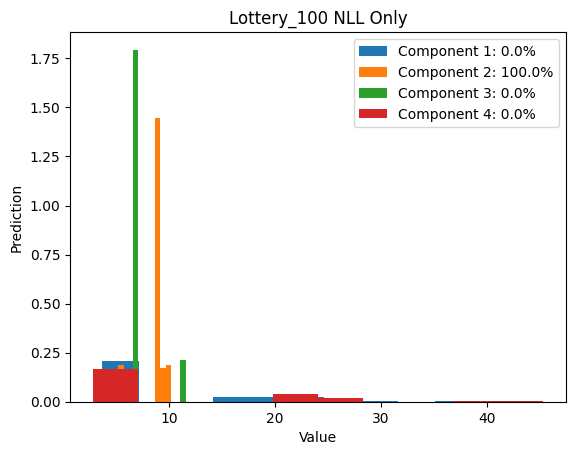

<Figure size 640x480 with 0 Axes>

In [62]:
nlls_n = []
bprs_n = []
for model_path in nll_models:

    model = keras.models.load_model(model_path)
    y_preds = model(val_X_THS)

    nll = mixture_poi_loss(val_y_TS, y_preds)
    bpr = mix_bpr(val_y_TS, y_preds, negative_bpr_K_func=negative_bpr_K)
    plot_component_histograms(y_preds, title_add='NLL Only',
                               save_dir=model_dir, file_add='nll')
    
    plot_winners(y_preds, K, title_add=f'NLL Only, BPR:{-bpr*100:.1f}%',
                               save_dir=model_dir, file_add='nll')

    nlls_n.append(tf.reduce_mean(nll))
    bprs_n.append(bpr)



Text(0, 0.5, 'BPR')

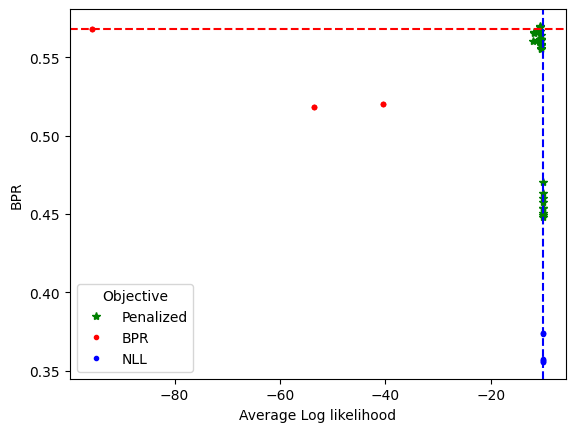

In [52]:
plt.plot(-np.array(nlls), -np.array(bprs), 'g*', label='Penalized')
plt.plot(-np.array(nlls_b), -np.array(bprs_b), 'r.', label='BPR')
plt.plot(-np.array(nlls_n), -np.array(bprs_n), 'b.', label='NLL')
#plot vertical line at max nll
plt.axvline(-np.min(nlls_n), color='b', linestyle='--')   
plt.axhline(-np.min(bprs_b), color='r', linestyle='--')   
plt.legend(title='Objective')
plt.xlabel('Average Log likelihood')
plt.ylabel('BPR')

In [48]:
np.min(nlls_n)

9.983924

In [49]:
np.min(nlls)

10.087421

'/cluster/tufts/hugheslab/kheuto01/synth_topk/save_long_plot_hist_H3/K4_thresh0.7_penalty50_lr0.05'